In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 한글 폰트 오류 해결
from matplotlib import font_manager,rc
font_path="./malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [2]:
file=r'./subway_raw.csv'
raw=pd.read_csv(file)
raw.head()

사용일자 요일  노선명     역명   승차총승객수   하차총승객수  승하자총승객수       연월     월일  \
0  2019-01-01  월  2호선  을지로4가   3862.0   3728.0   7590.0  2019-01  01-01   
1  2019-01-01  월  3호선  을지로3가   8104.0   7554.0  15658.0  2019-01  01-01   
2  2019-01-01  월  2호선  을지로입구  22478.0  21330.0  43808.0  2019-01  01-01   
3  2019-01-01  월  2호선     시청   8381.0   6049.0  14430.0  2019-01  01-01   
4  2019-01-01  월  6호선    동묘앞   8045.0   8504.0  16549.0  2019-01  01-01   

       등록일자  
0  20190104  
1  20190104  
2  20190104  
3  20190104  
4  20190104

In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   사용일자     107028 non-null  object 
 1   요일       107028 non-null  object 
 2   노선명      107028 non-null  object 
 3   역명       107028 non-null  object 
 4   승차총승객수   107028 non-null  float64
 5   하차총승객수   107028 non-null  float64
 6   승하자총승객수  107028 non-null  float64
 7   연월       107028 non-null  object 
 8   월일       107028 non-null  object 
 9   등록일자     107028 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 8.2+ MB


In [11]:
maxval=raw.sort_values('승하자총승객수',ascending=False)
maxval.head()
# 1월 11일 지하철 가장 많이 이용

사용일자 요일  노선명  역명    승차총승객수    하차총승객수   승하자총승객수       연월     월일  \
5943   2019-01-11  목  2호선  강남  132727.0  137826.0  270553.0  2019-01  01-11   
14224  2019-01-25  목  2호선  강남  131976.0  136614.0  268590.0  2019-01  01-25   
10085  2019-01-18  목  2호선  강남  130864.0  136701.0  267565.0  2019-01  01-18   
26629  2019-02-15  목  2호선  강남  129941.0  135541.0  265482.0  2019-02  02-15   
1809   2019-01-04  목  2호선  강남  129878.0  134948.0  264826.0  2019-01  01-04   

           등록일자  
5943   20190114  
14224  20190128  
10085  20190121  
26629  20190218  
1809   20190107

In [6]:
grouped=raw.groupby(['연월']).agg(승하자총승객수=('승하자총승객수','sum')).sort_values('연월',ascending=True)
grouped
# 그룹 출력
#for key,group in grouped:
#    print(key)
#    print(group.head())
#grouped.plot(marker='o',figsize=(20,10),markersize=10,linewidth=2)
#plt.title('월별 승하차총승객수',size=20)
#plt.ylabel('승하차총승객수')

# 5월이 가장 많음

승하자총승객수
연월                  
2019-01  442746389.0
2019-02  379836010.0
2019-03  466692826.0
2019-04  470934348.0
2019-05  485718557.0
2019-06  442210635.0

Text(0, 0.5, '승하차총승객수')

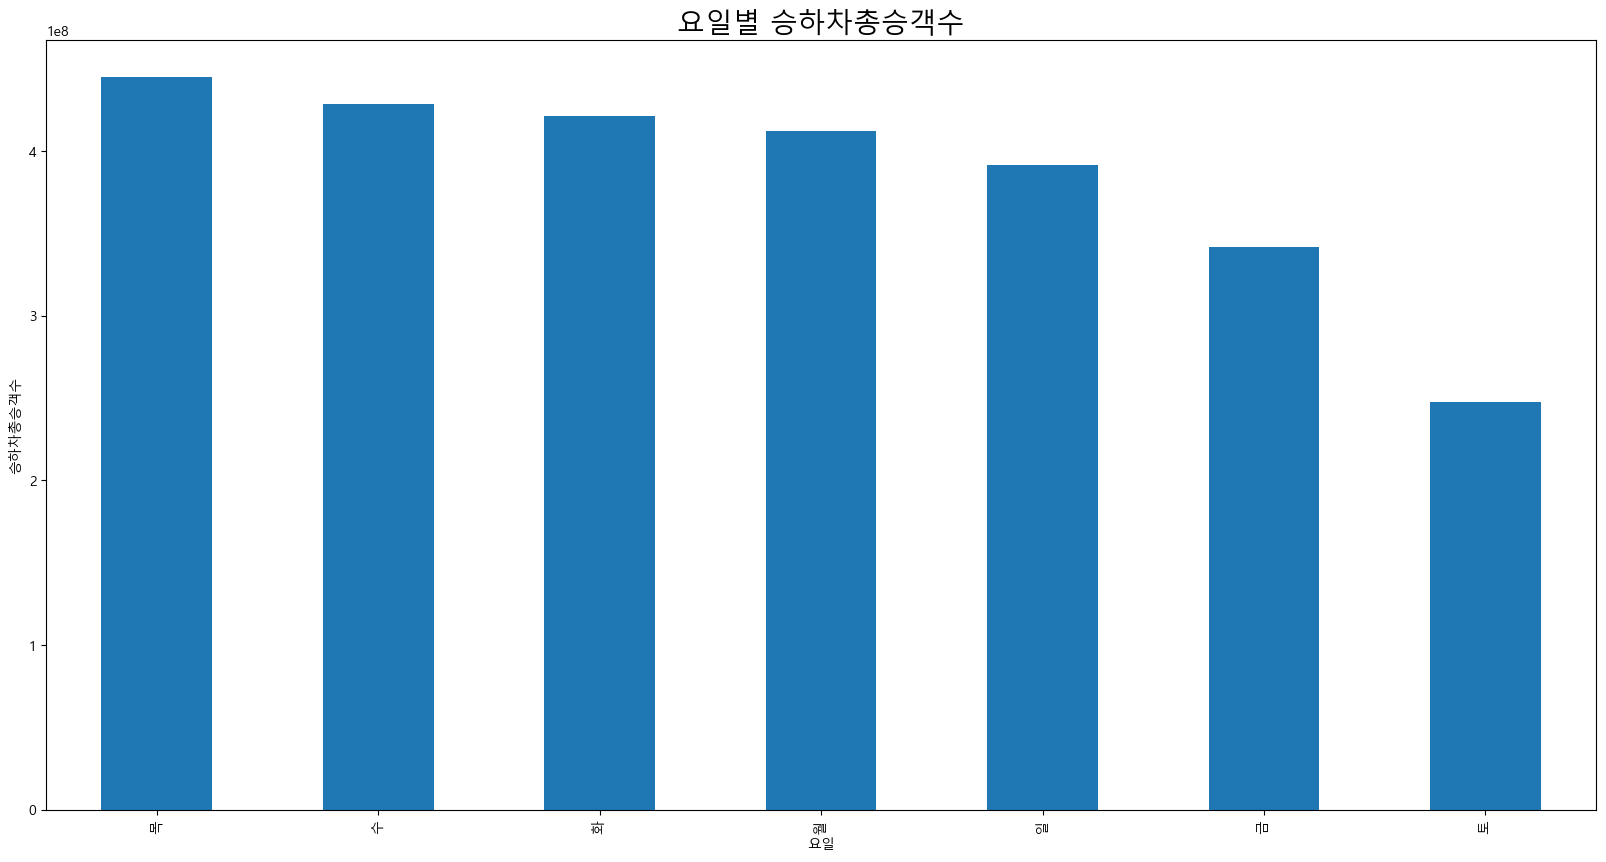

In [13]:
grouped2=raw.groupby(['요일']).sum().sort_values('승하자총승객수',ascending=False)
grouped2['승하자총승객수'].plot(kind='bar',figsize=(20,10),width=0.5)
# 목요일이 가장 많음
#raw['요일'].value_counts().plot(kind='bar',figsize=(20,10),width=0.7)
plt.title('요일별 승하차총승객수',size=20)
plt.ylabel('승하차총승객수')


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, '06-06'),
  Text(0.0, 0, '01-01'),
  Text(25.0, 0, '01-26'),
  Text(50.0, 0, '02-20'),
  Text(75.0, 0, '03-17'),
  Text(100.0, 0, '04-11'),
  Text(125.0, 0, '05-06'),
  Text(150.0, 0, '05-31'),
  Text(175.0, 0, '06-25'),
  Text(200.0, 0, '')])

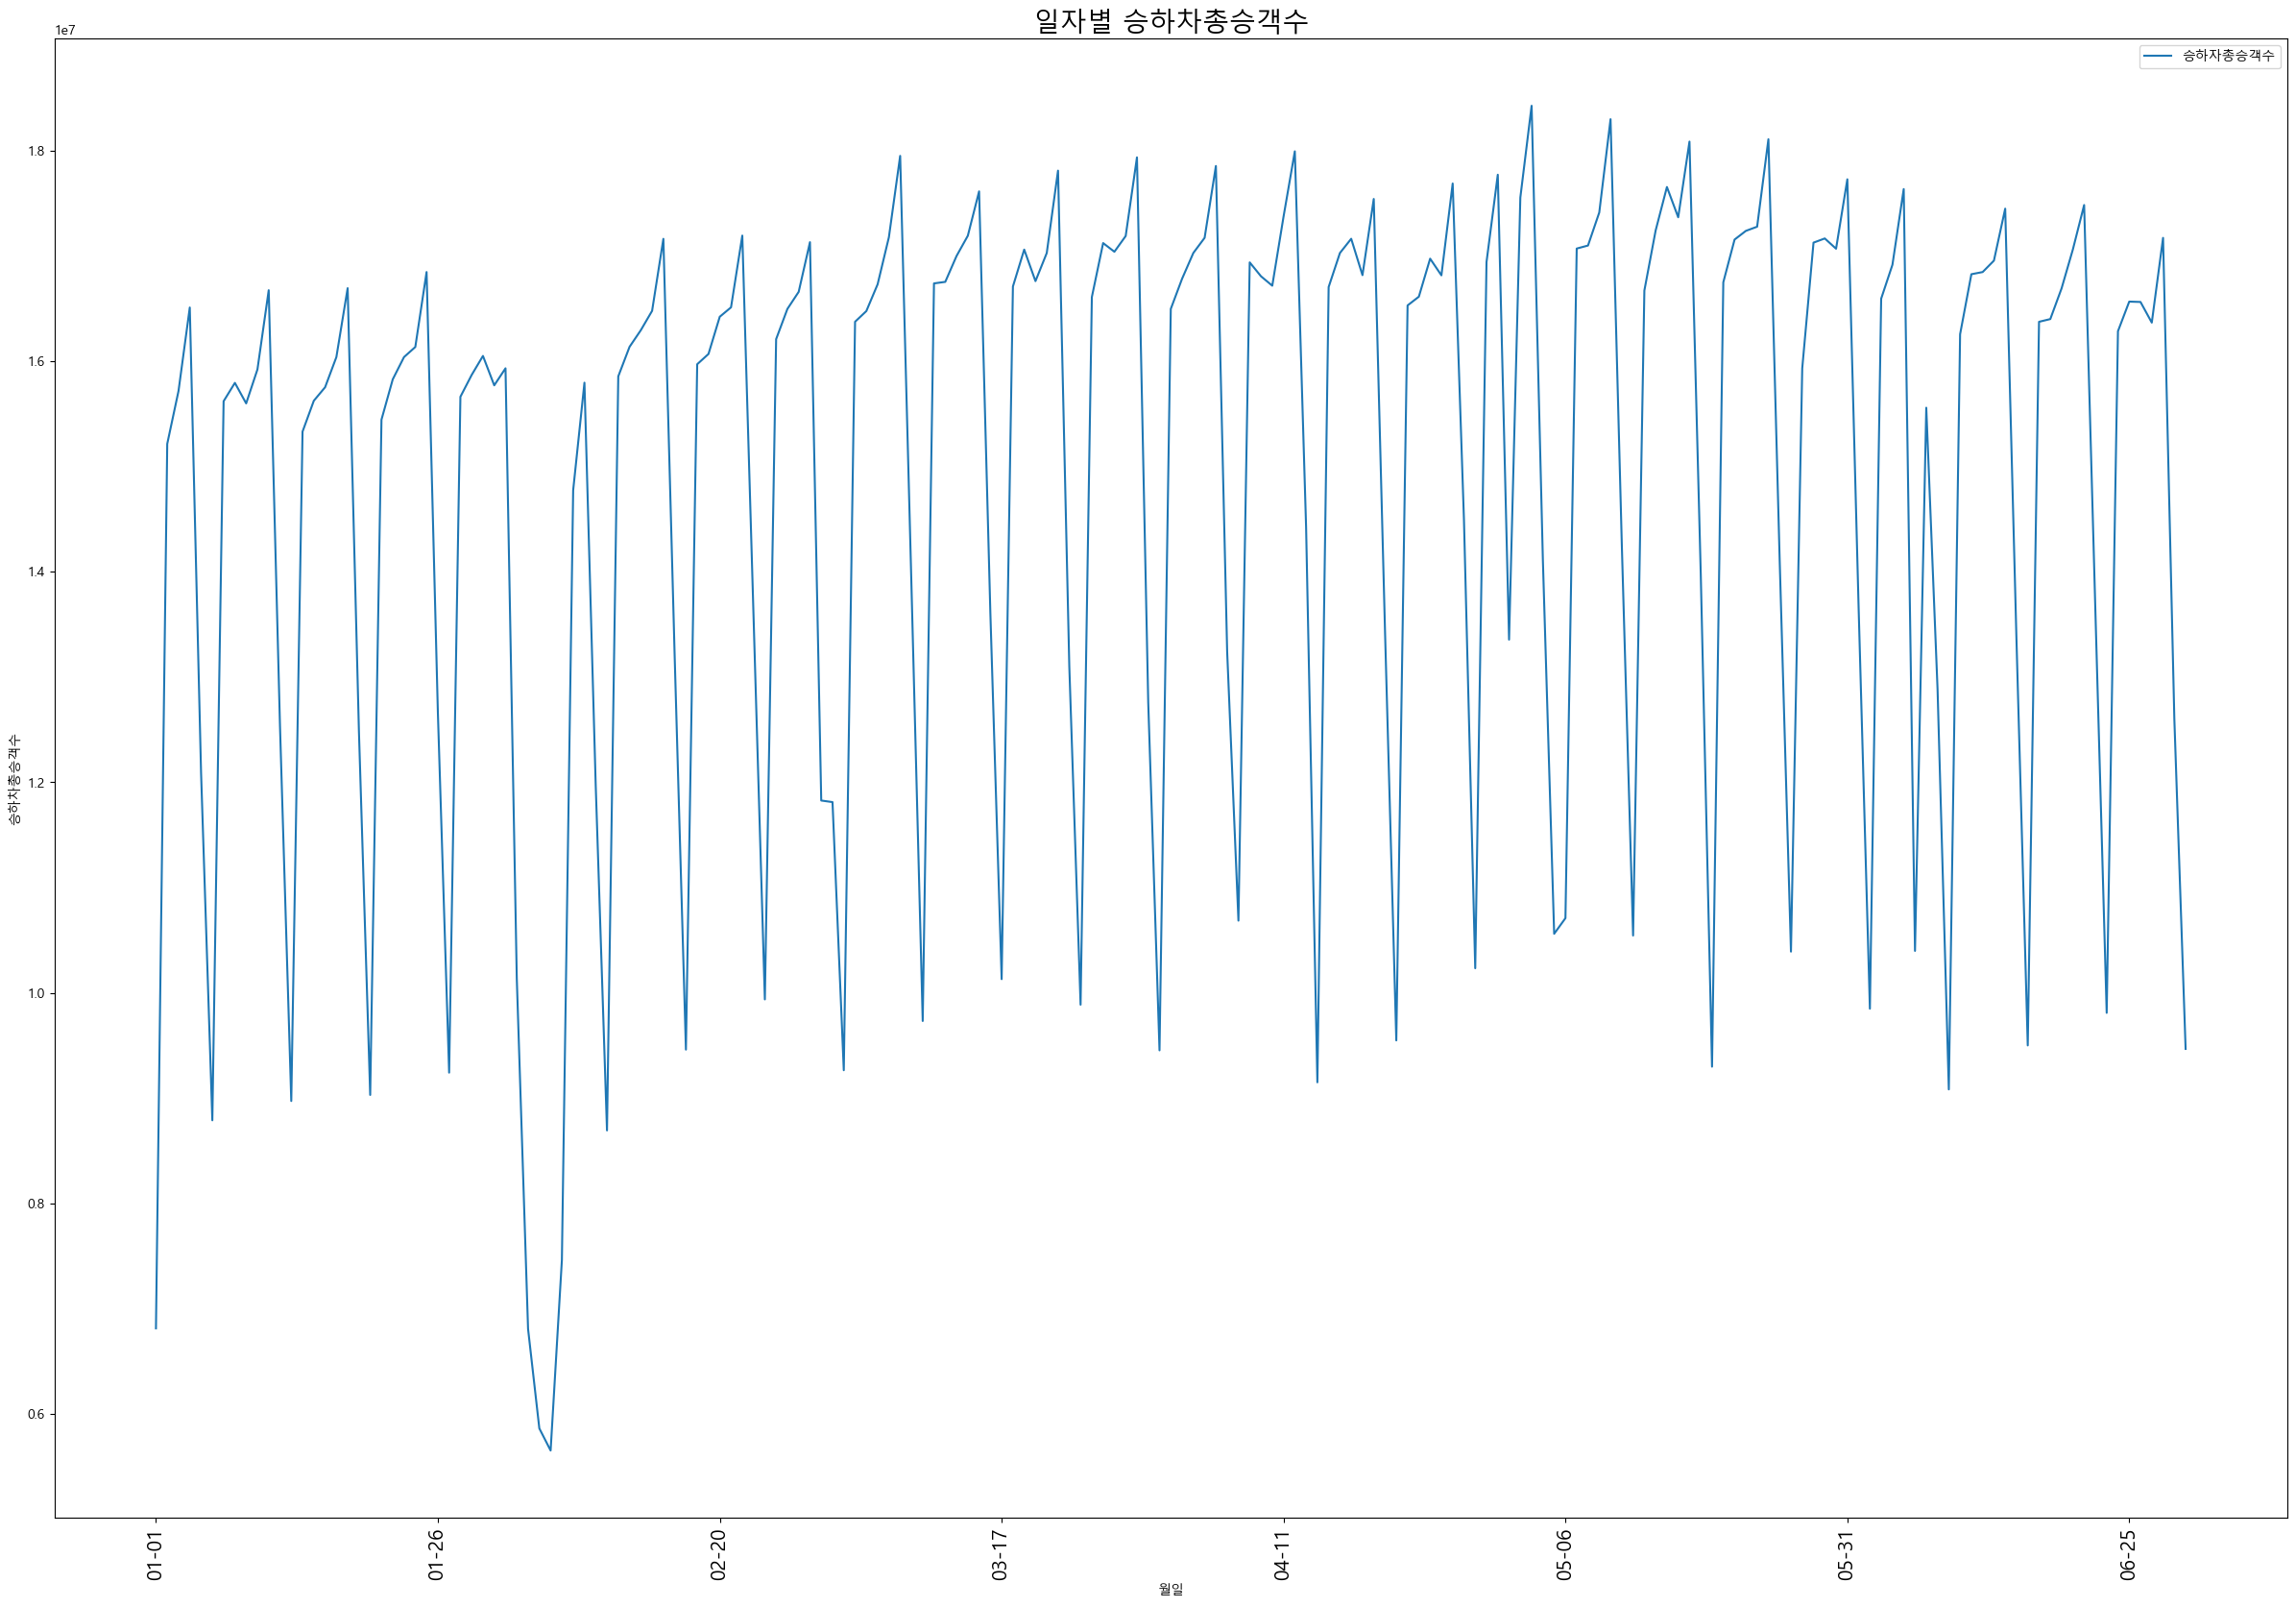

In [14]:
grouped4=raw.groupby(['월일']).agg(승하자총승객수=('승하자총승객수','sum'))
grouped4.plot(figsize=(30,20))
plt.title('일자별 승하차총승객수',size=20)
plt.ylabel('승하차총승객수')
plt.xticks(size=15,rotation=90)


In [15]:
# grouped5=raw.groupby(['역명'])
# grouped5=grouped5['승차총승객수'].sum()
# maxval4=grouped5.max()
# grouped5.loc[grouped5==maxval4]

grouped5=raw.groupby(['역명']).agg(승차총승객수=('승차총승객수','sum')).sort_values('승차총승객수',ascending=False)
grouped5.head()
# 잠실역이 가장 많음

승차총승객수
역명               
잠실     18574323.0
강남     18148024.0
고속터미널  17541287.0
홍대입구   17270084.0
서울역    17165598.0

In [16]:
grouped6=raw.groupby(['역명']).agg(하차총승객수=('하차총승객수','sum')).sort_values('하차총승객수',ascending=False)
grouped6.head()
# 강남역이 제일 많음

하차총승객수
역명               
강남     18470209.0
잠실     18390074.0
홍대입구   18323360.0
고속터미널  17761349.0
서울역    17139744.0

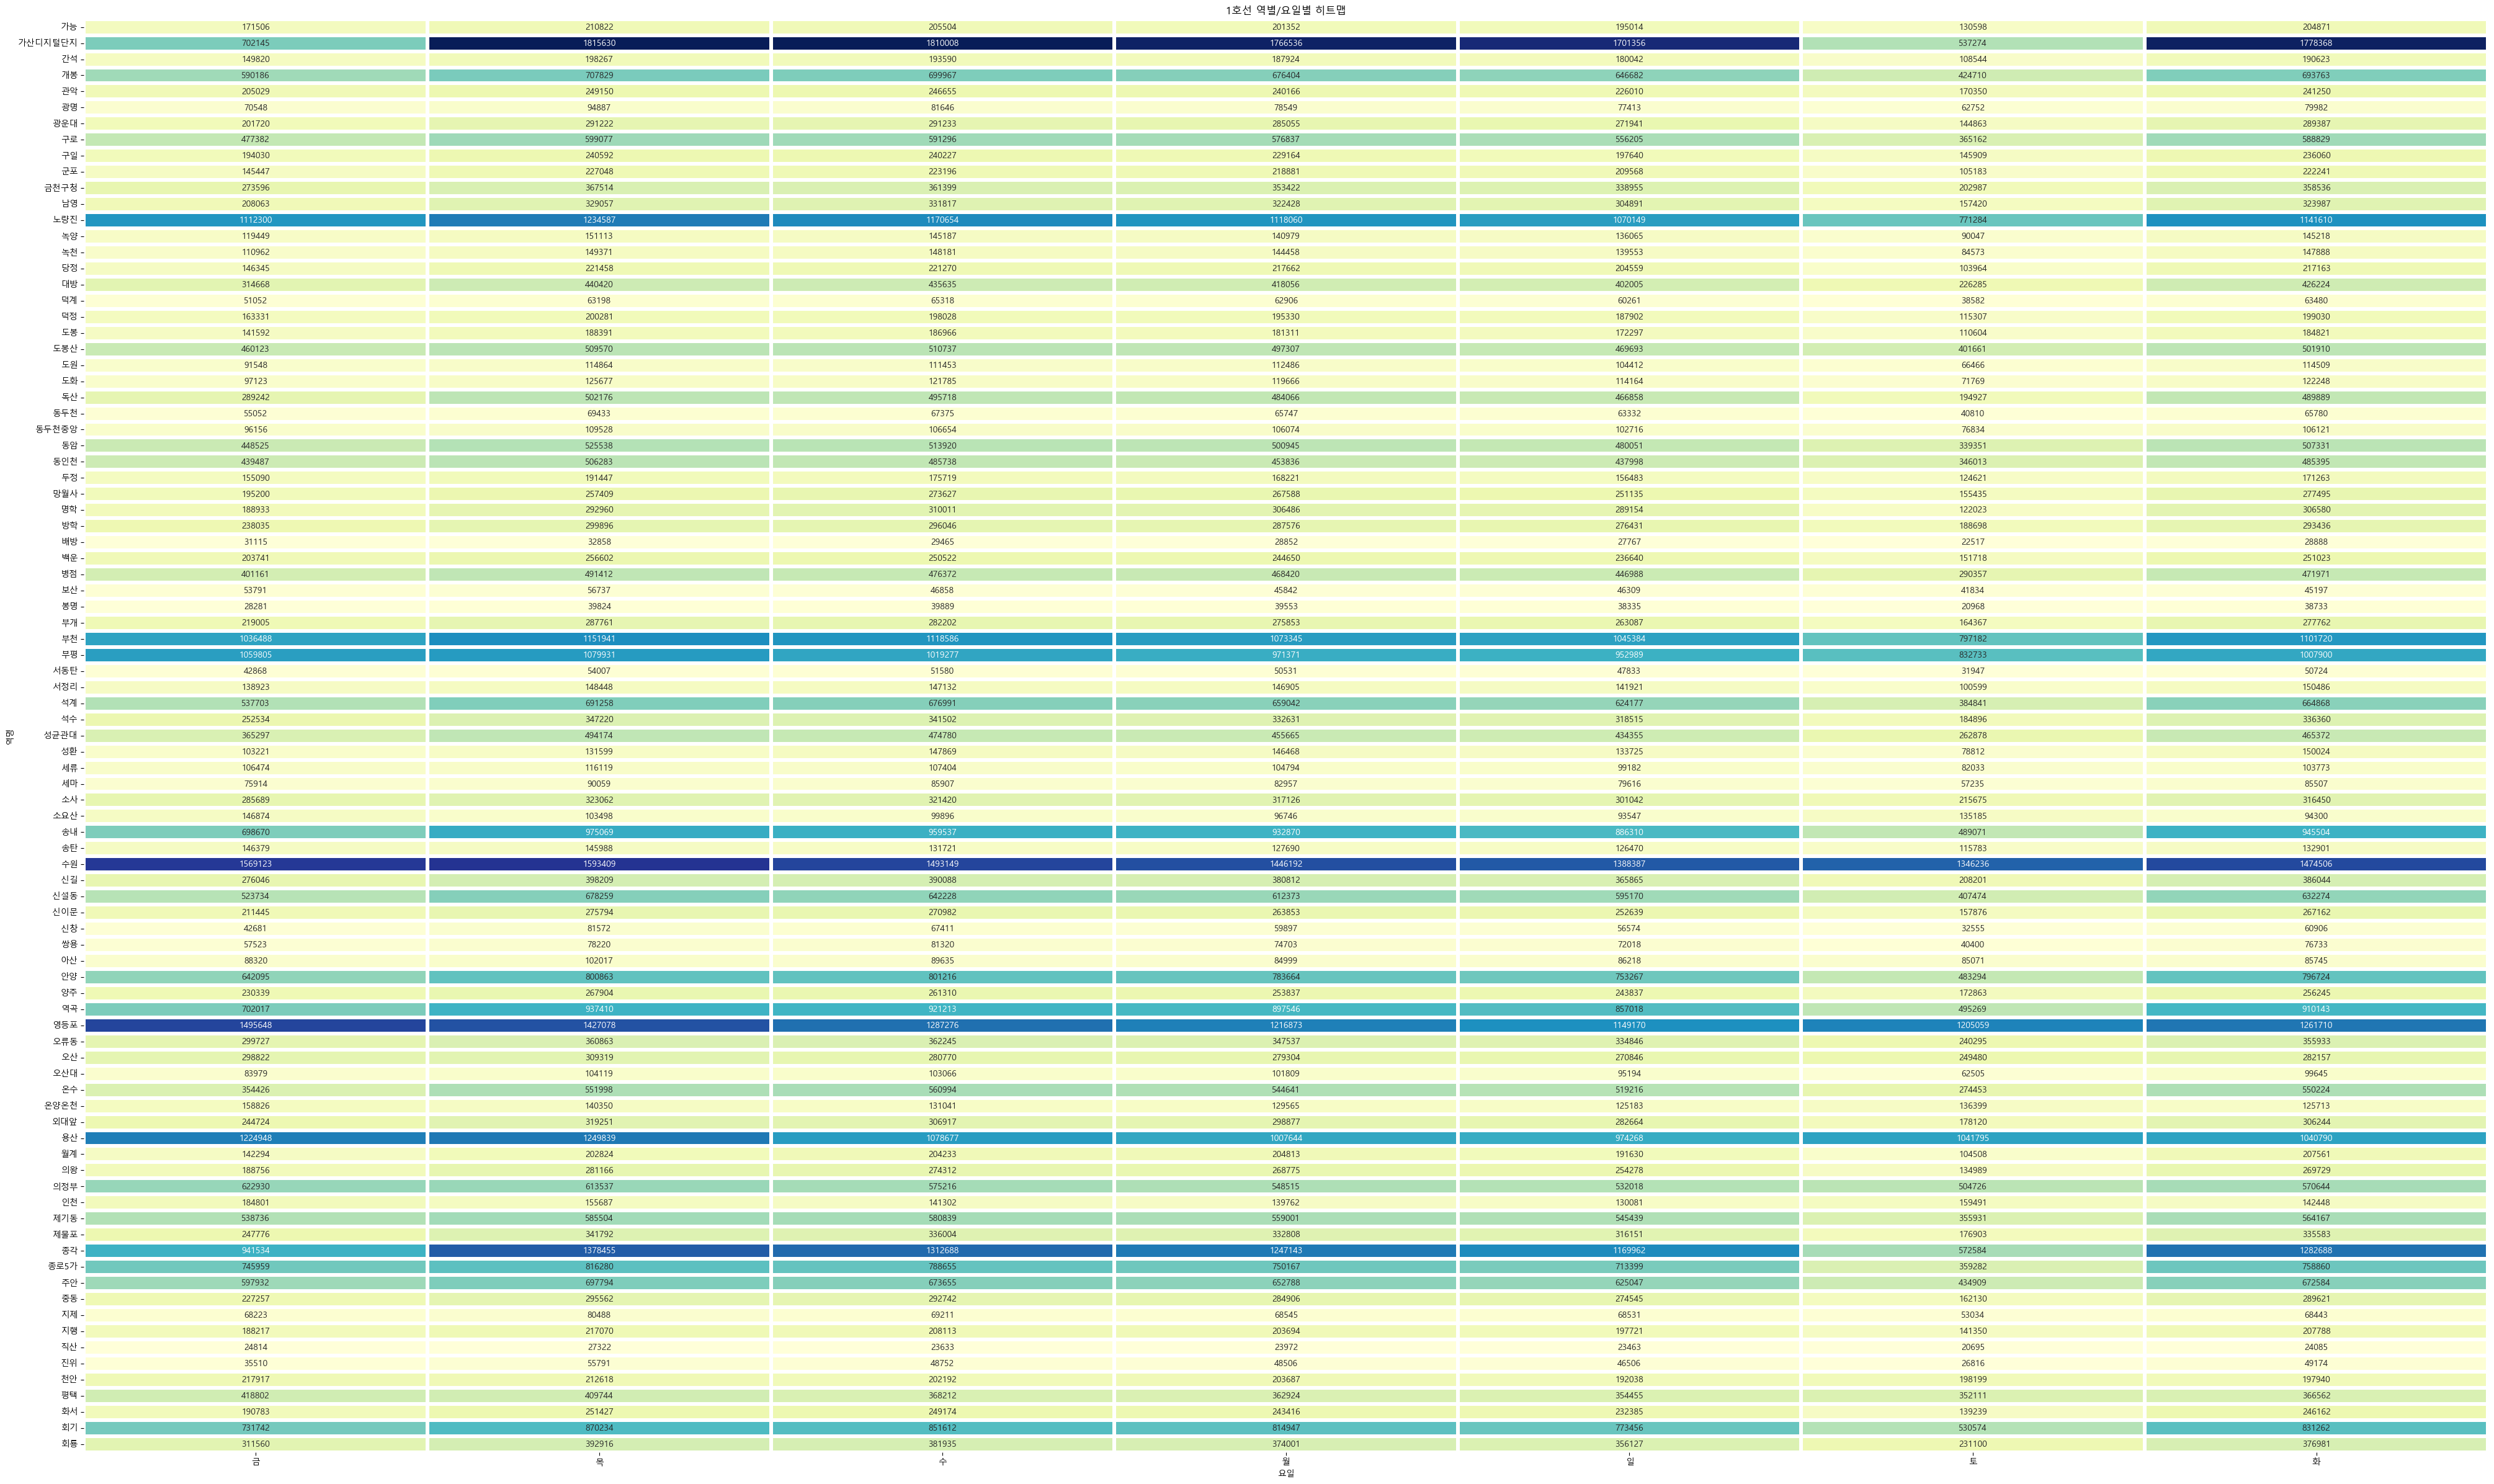

In [25]:
raw['승차총승객수']=raw['승차총승객수'].astype('int64')
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('1호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(50,30))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('1호선 역별/요일별 히트맵')
plt.show()

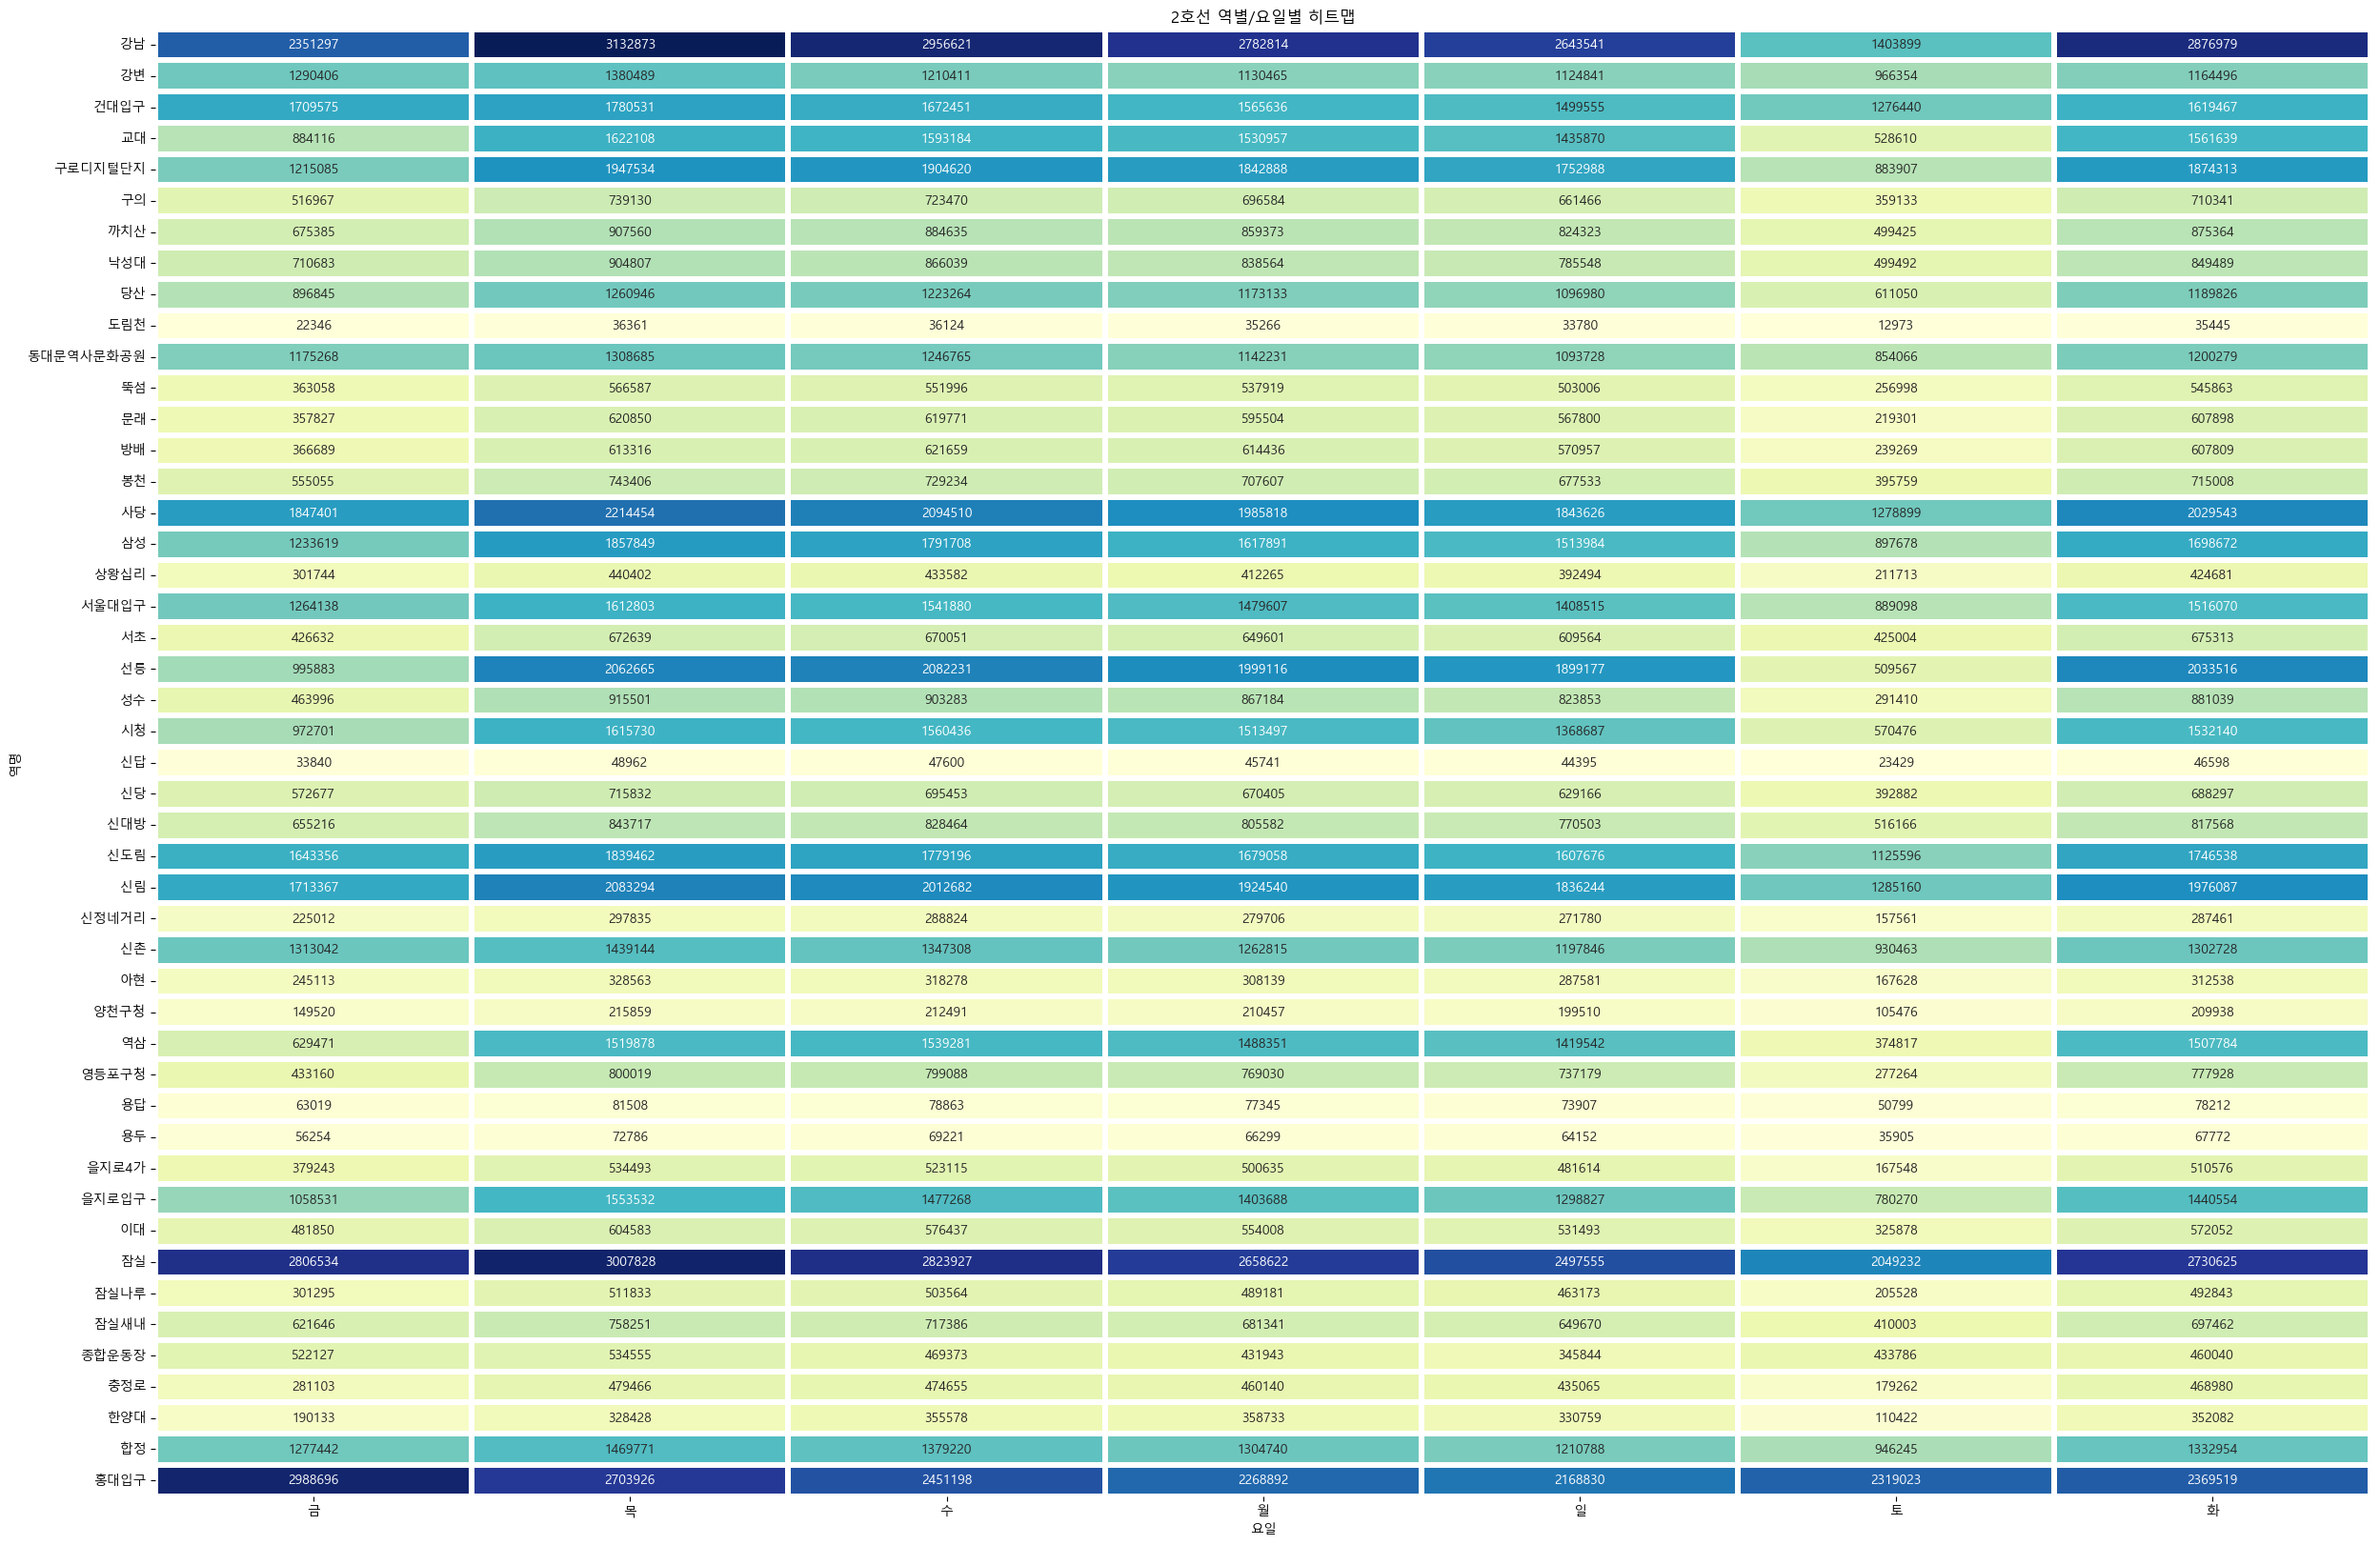

In [27]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('2호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('2호선 역별/요일별 히트맵')
plt.show()

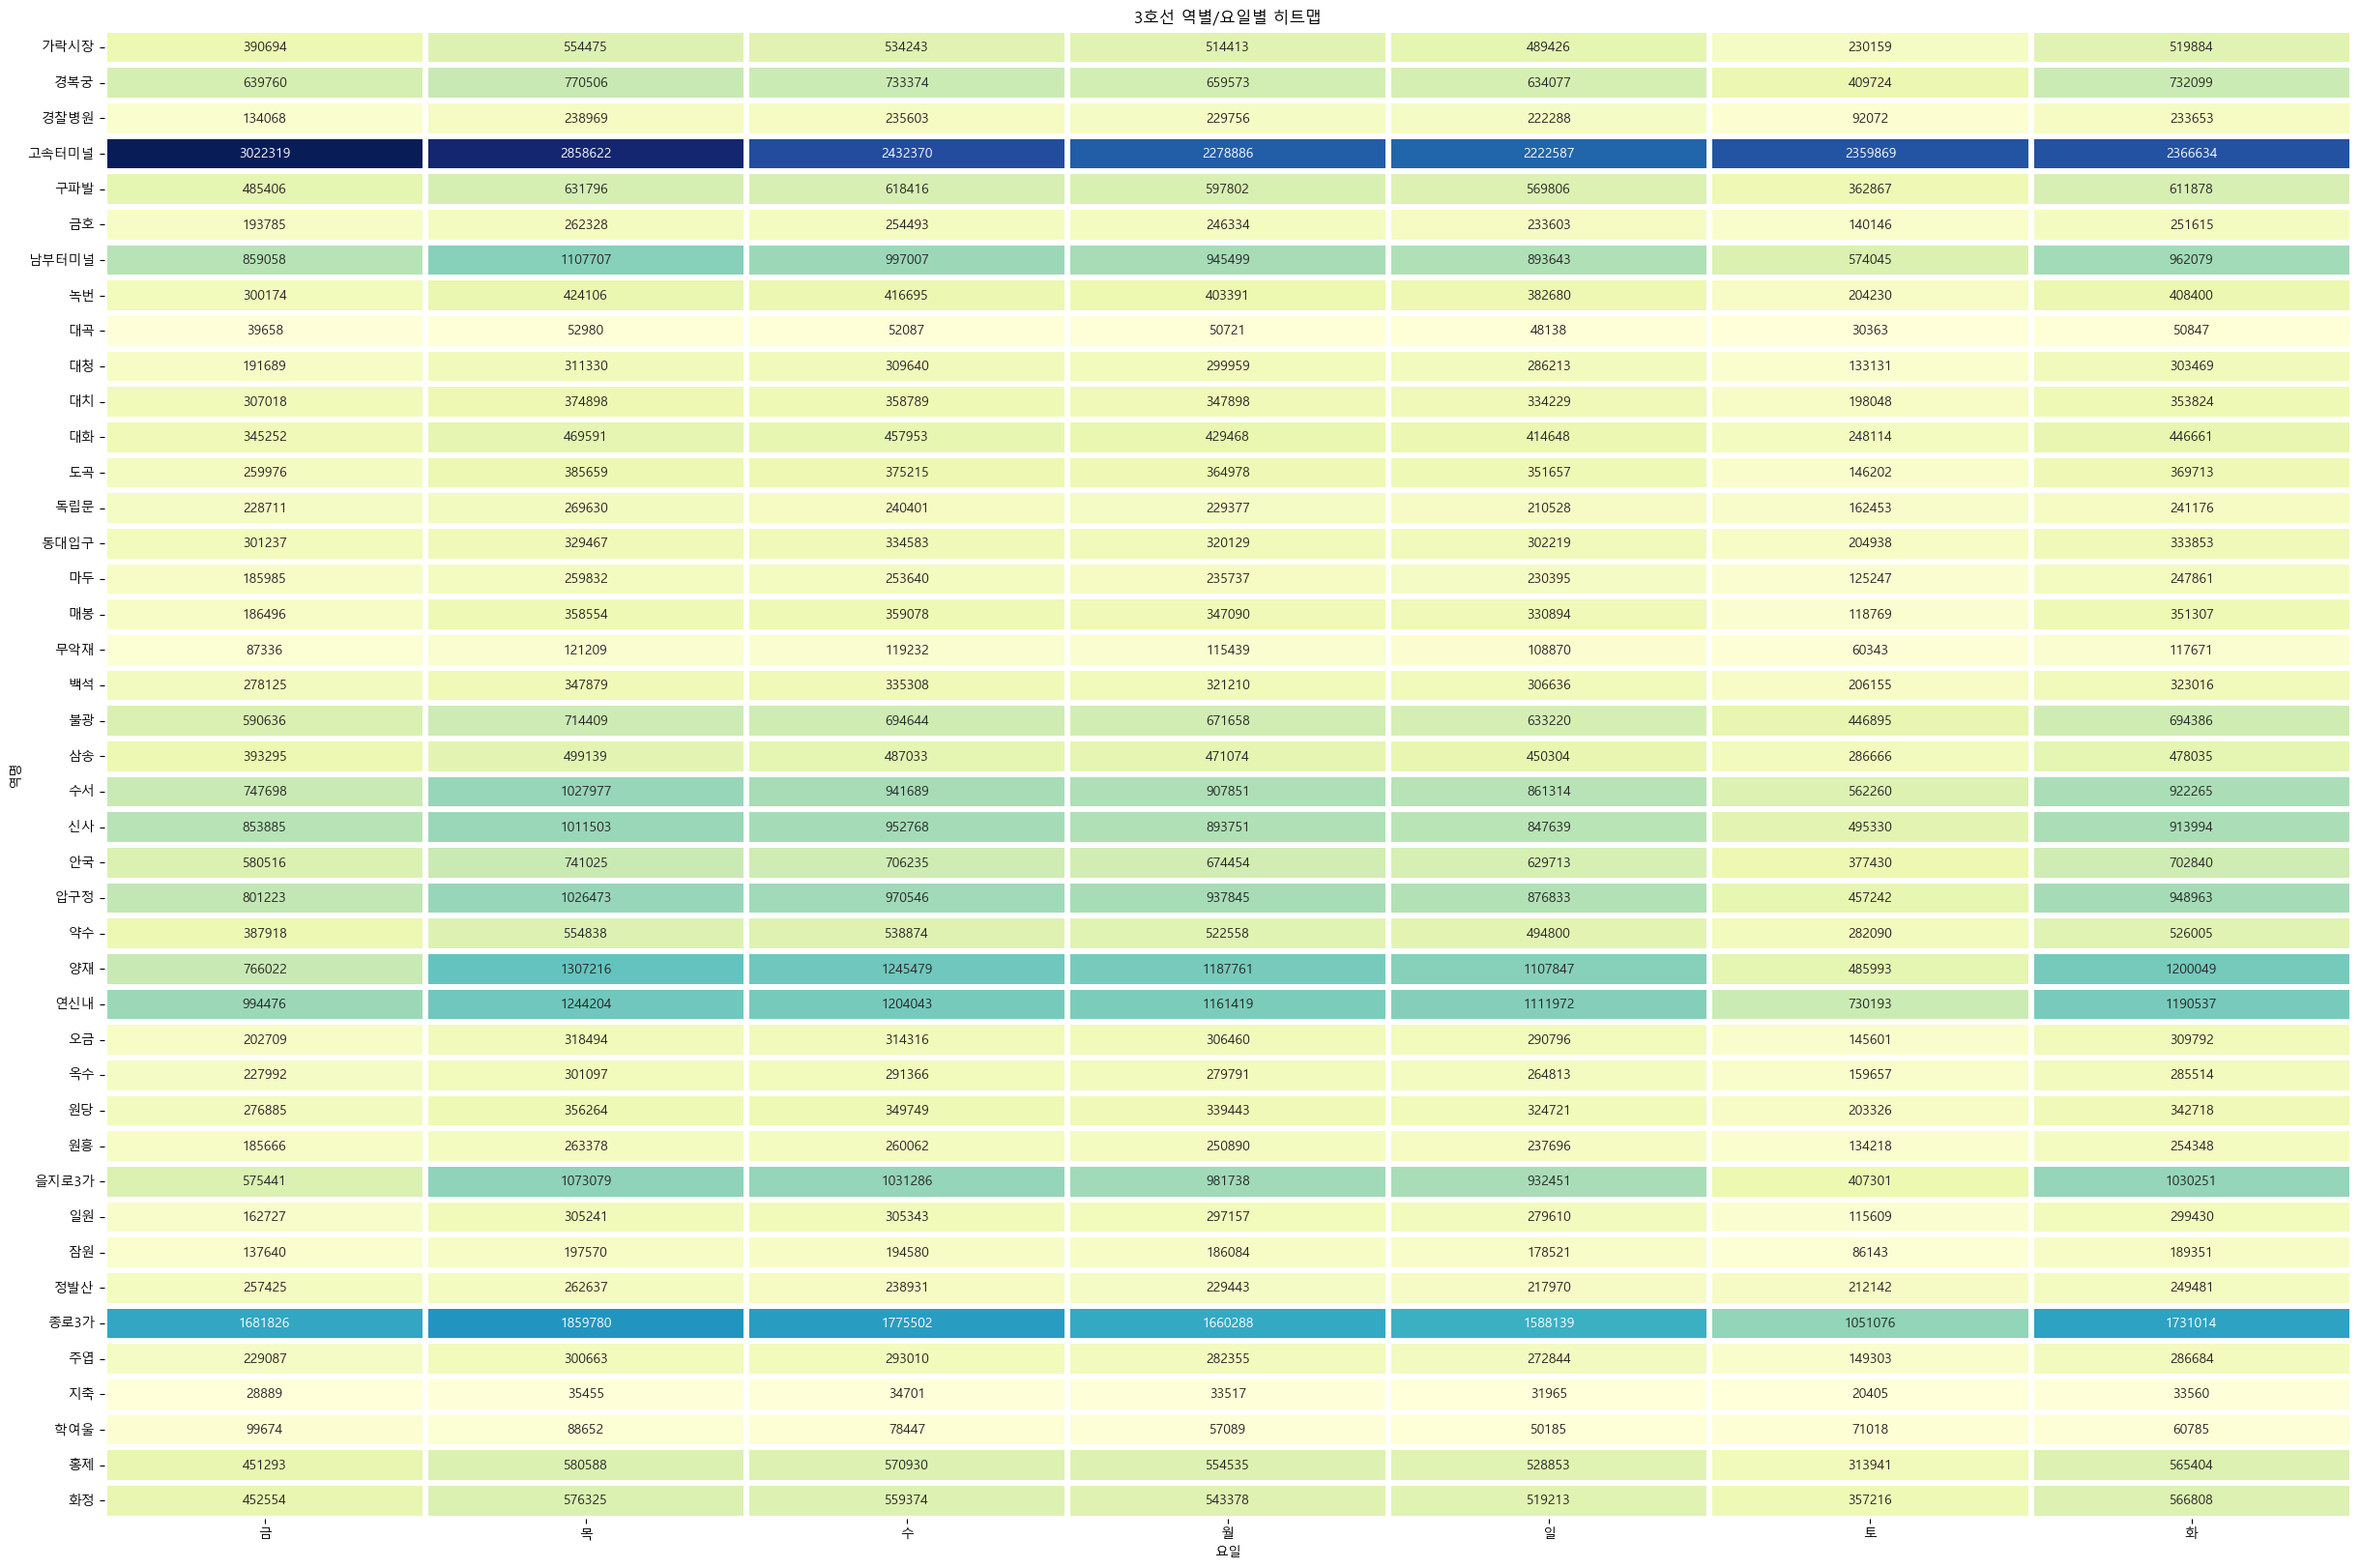

In [29]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('3호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('3호선 역별/요일별 히트맵')
plt.show()

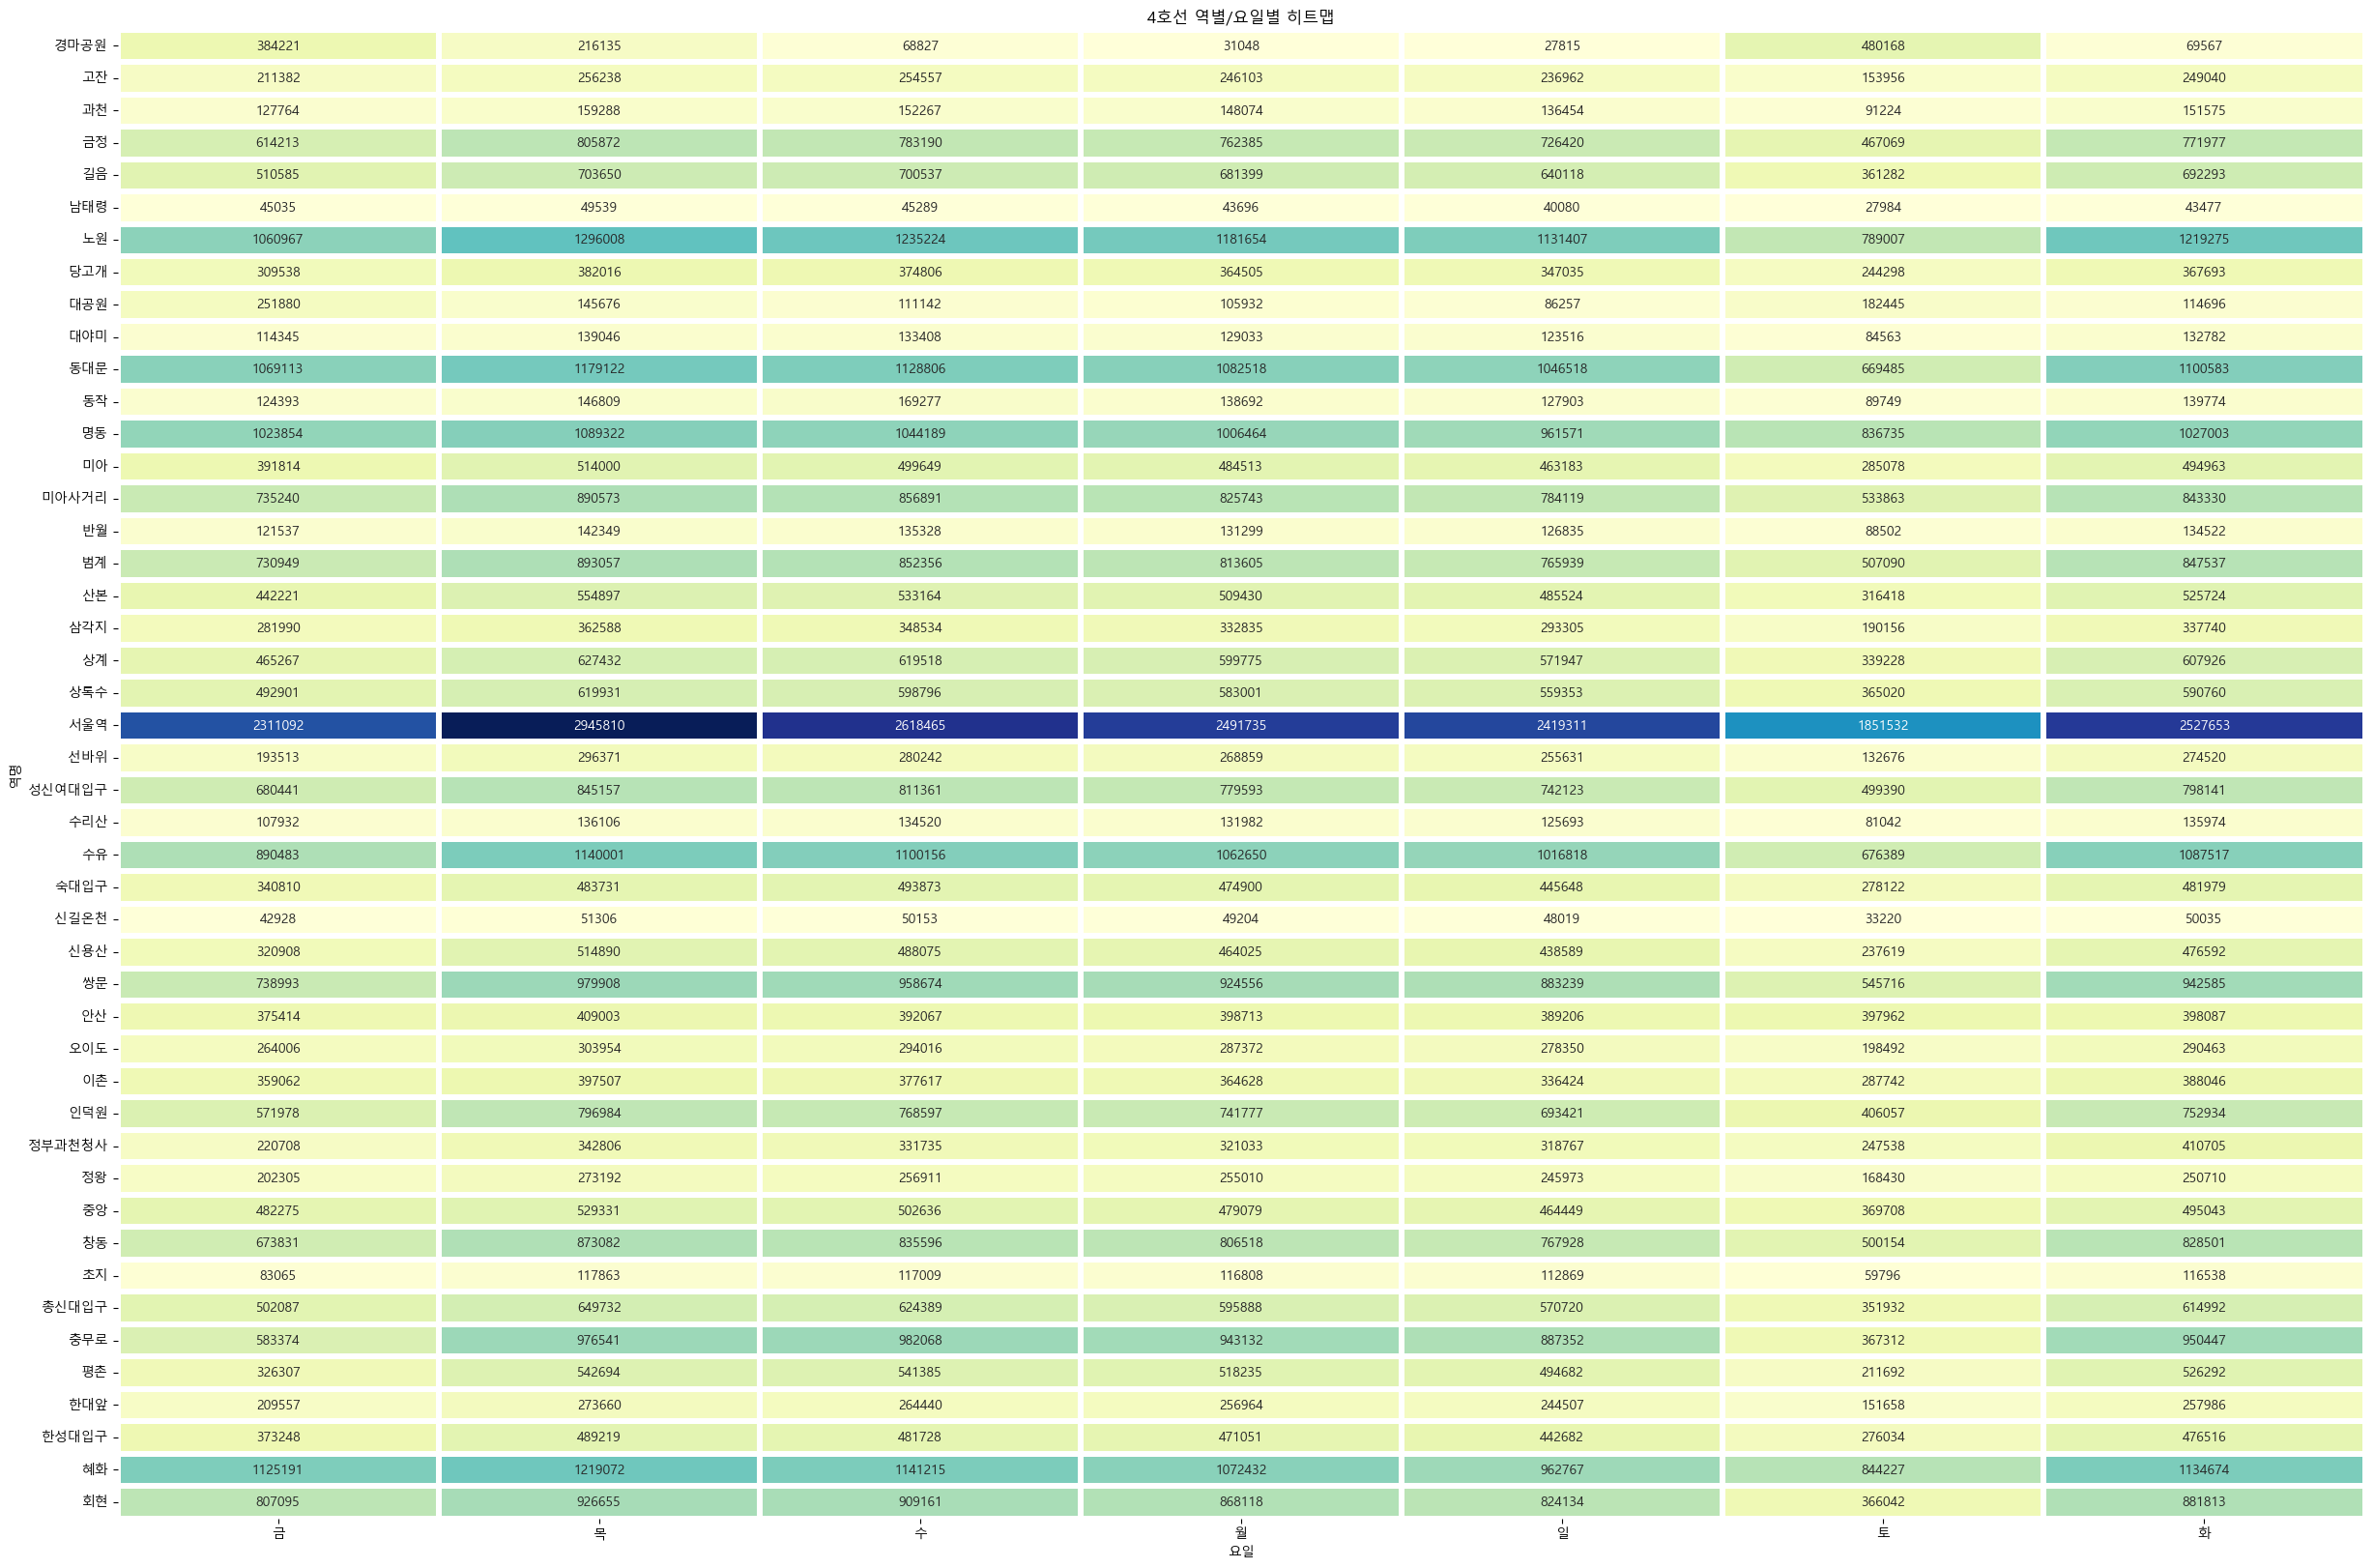

In [30]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('4호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('4호선 역별/요일별 히트맵')
plt.show()

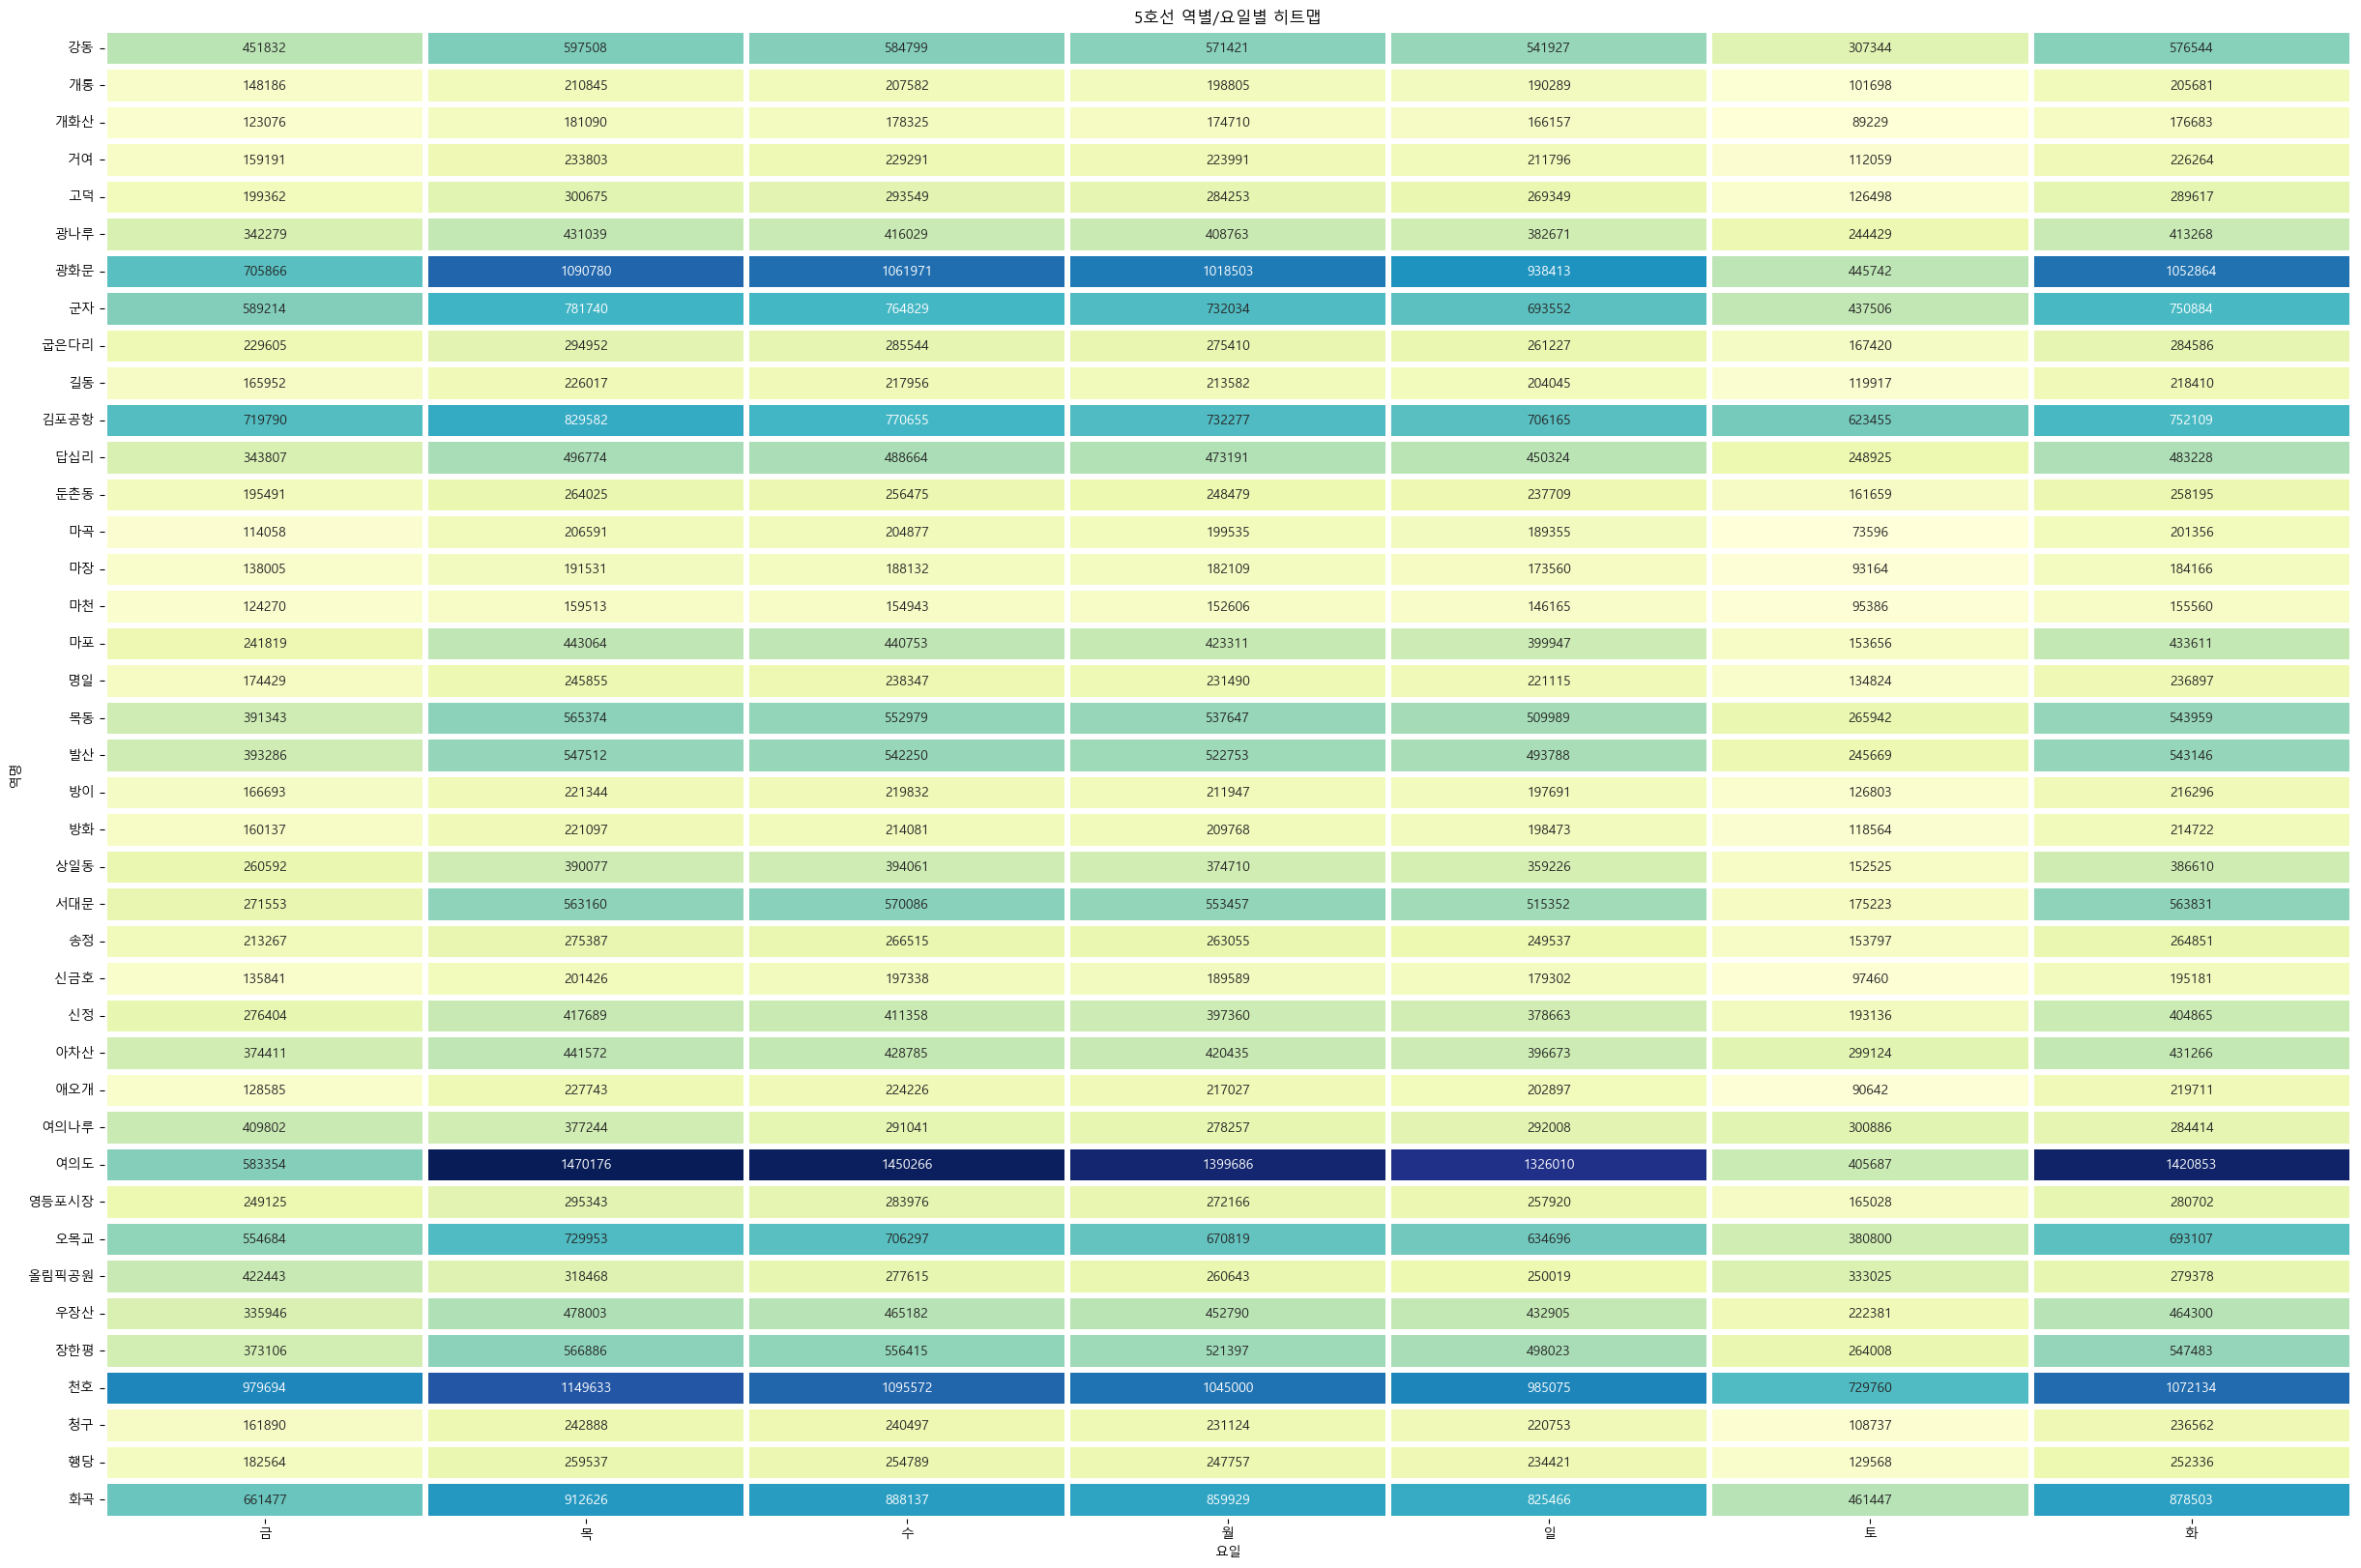

In [32]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('5호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('5호선 역별/요일별 히트맵')
plt.show()

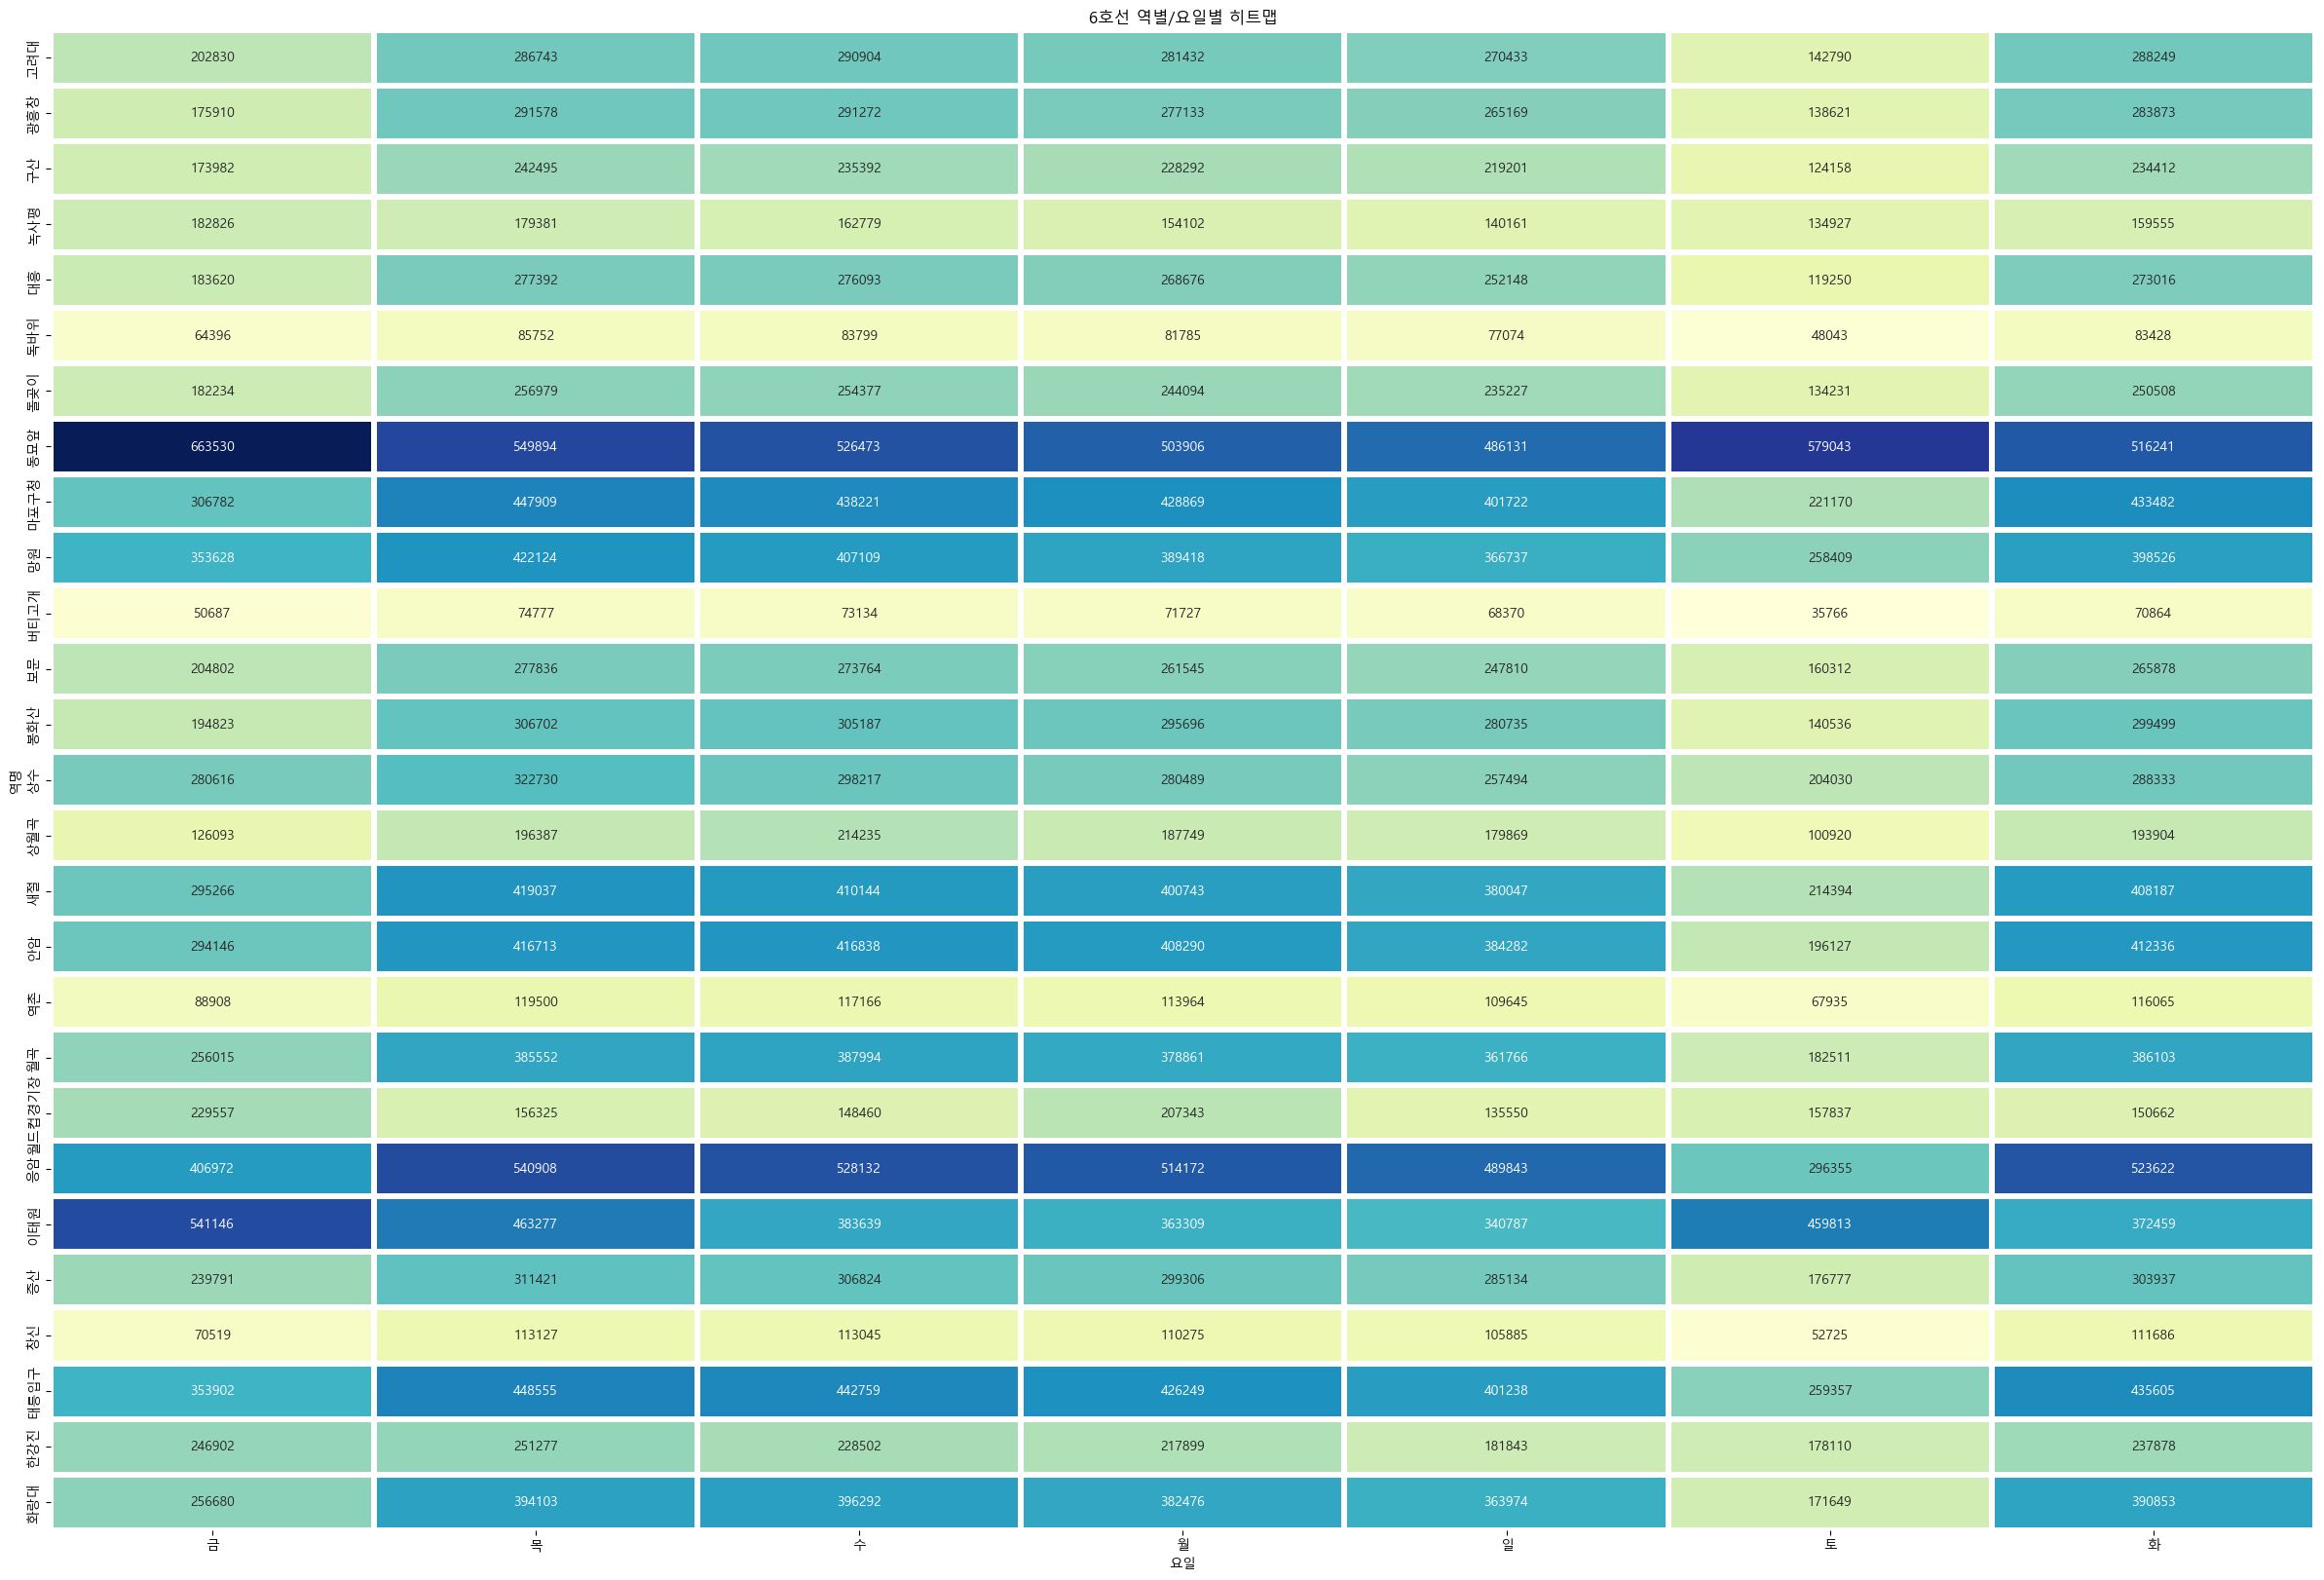

In [33]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('6호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('6호선 역별/요일별 히트맵')
plt.show()

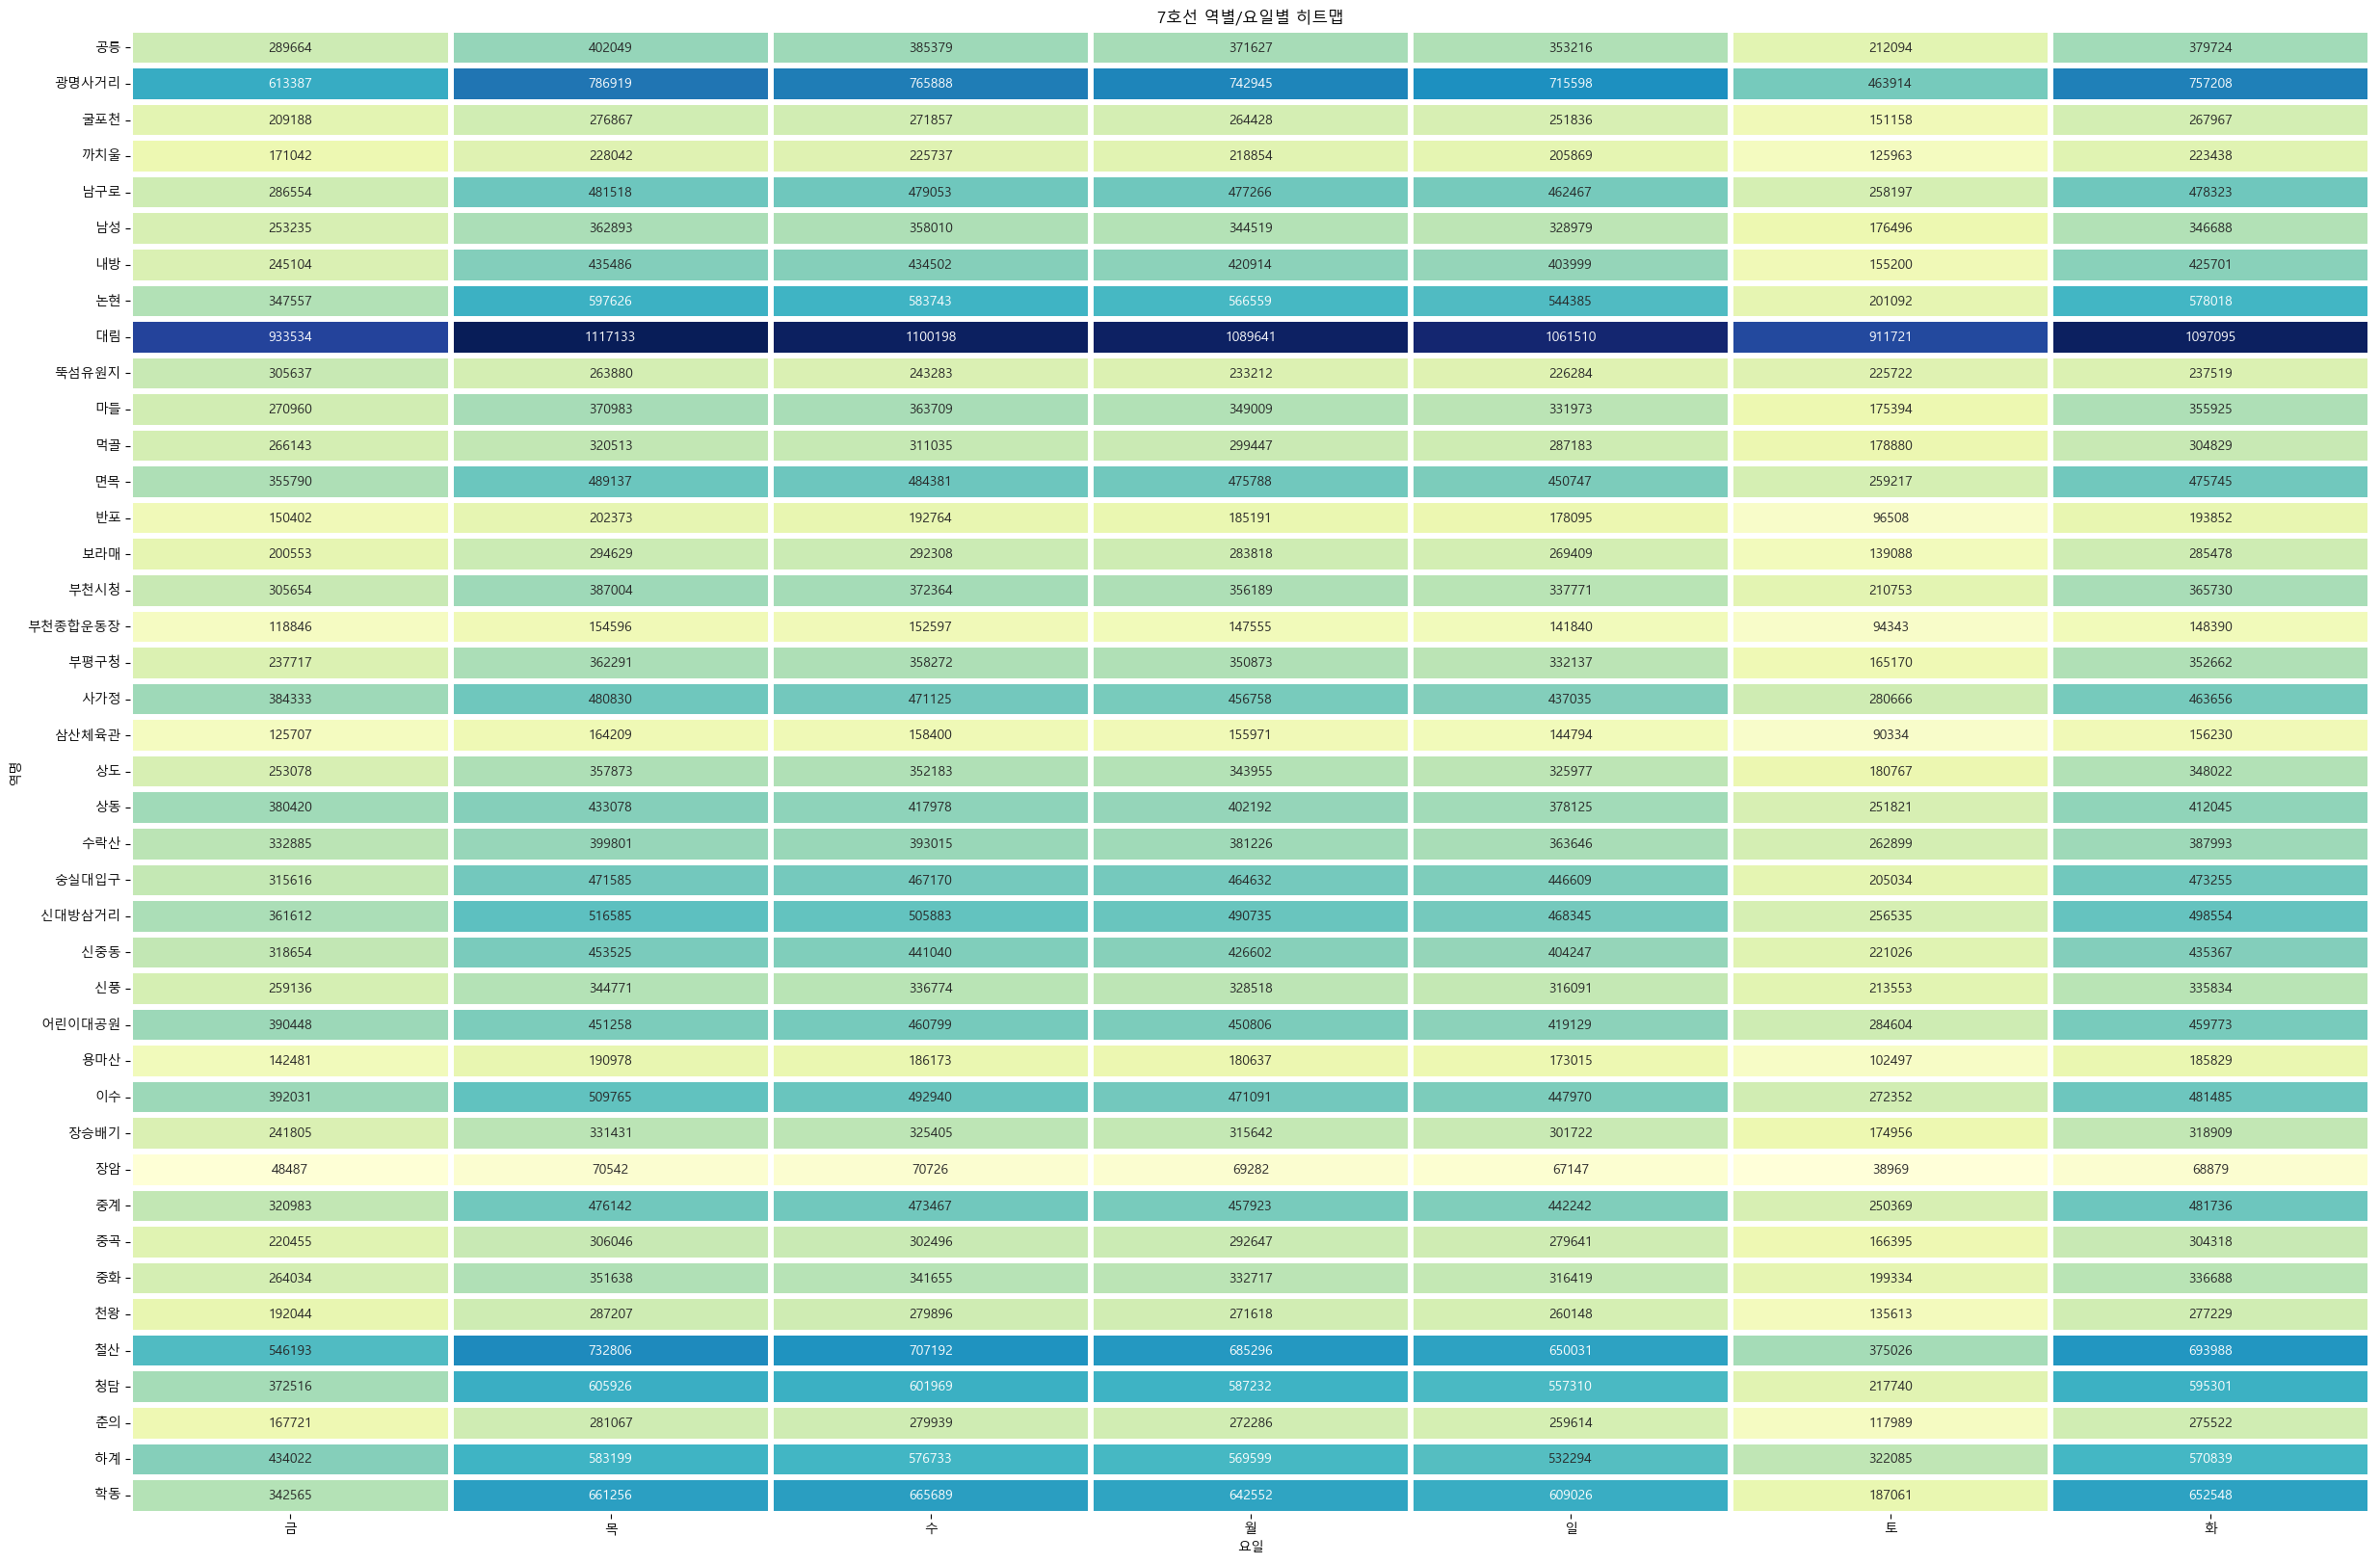

In [34]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('7호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('7호선 역별/요일별 히트맵')
plt.show()

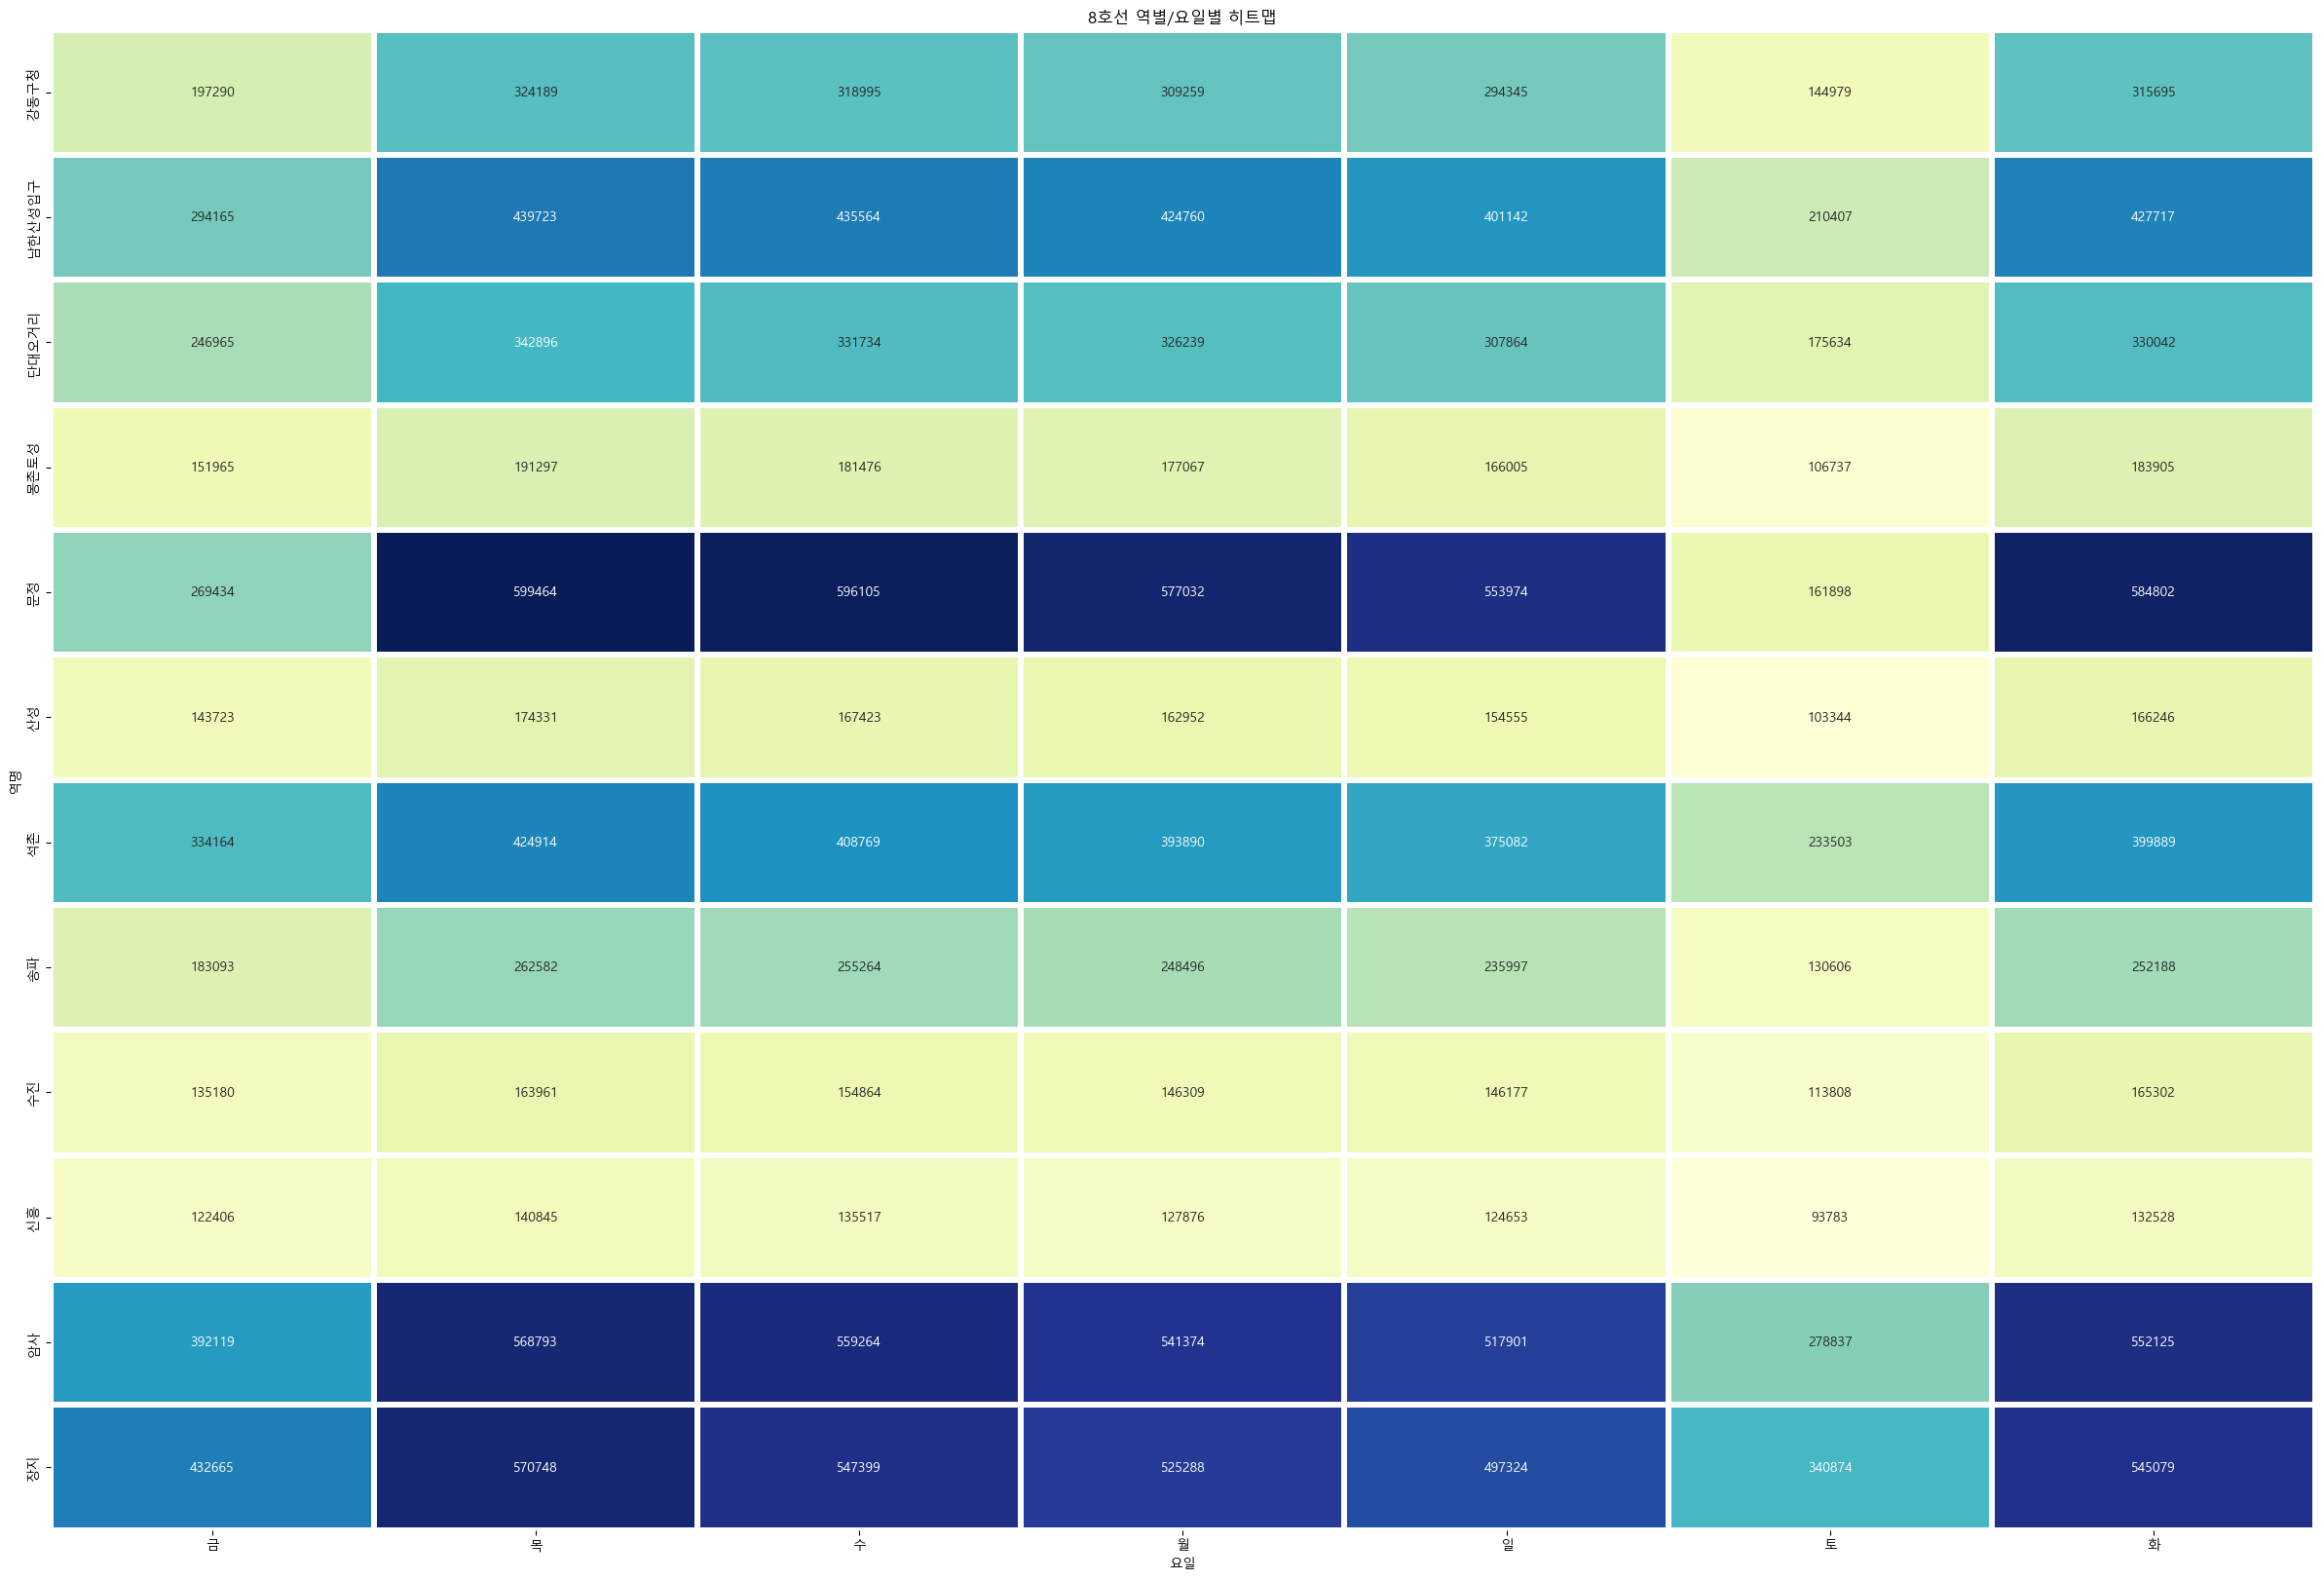

In [35]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('8호선')
table=pd.pivot_table(group1,index='역명',columns='요일',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=False)
plt.title('8호선 역별/요일별 히트맵')
plt.show()

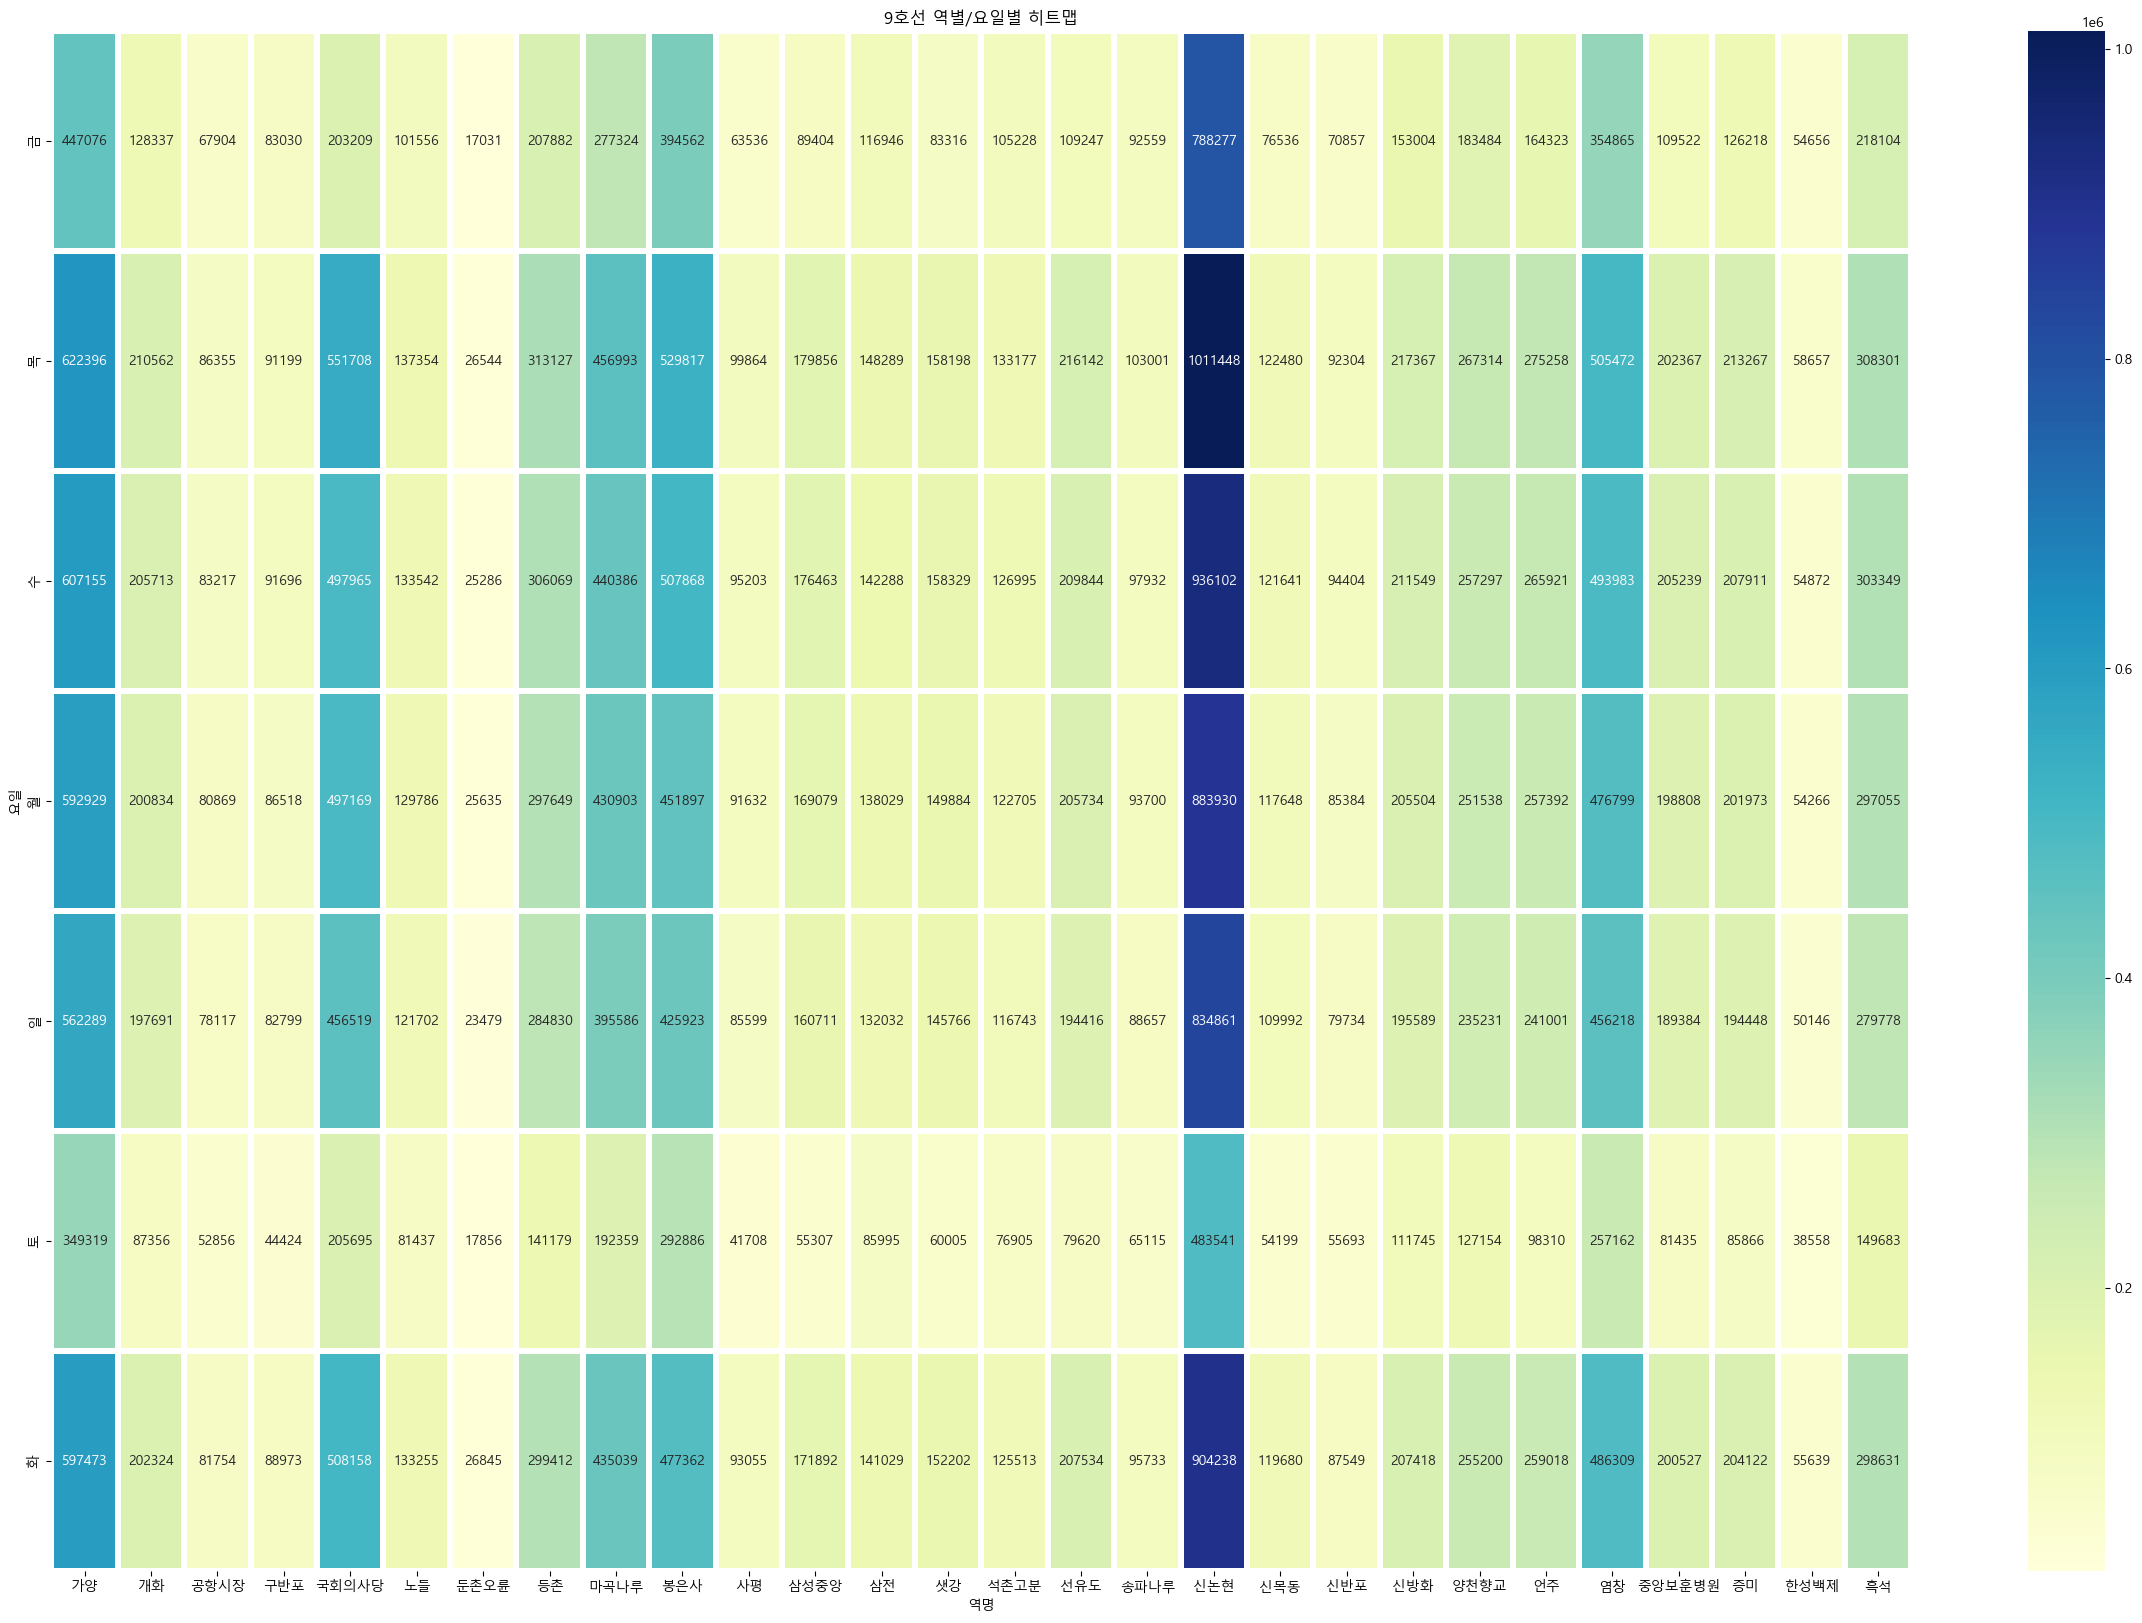

In [36]:
grouped7=raw.groupby(['노선명'])
group1=grouped7.get_group('9호선')
table=pd.pivot_table(group1,index='요일',columns='역명',values='승차총승객수',aggfunc='sum')
plt.figure(figsize=(30,20))
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=3,cbar=True)
plt.title('9호선 역별/요일별 히트맵')
plt.show()

In [3]:
import folium
file2='./지하철노선위경도정보2.csv'
df=pd.read_csv(file2)
df.head()

역이름  역지역         위도          경도   호선
0    낙성대  수도권  37.477090  126.963506  2호선
1     구룡  수도권  37.487027  127.059475  분당선
2  서울대입구  수도권  37.481285  126.952695  2호선
3     불광  수도권  37.610044  126.930302  3호선
4     월롱  수도권  37.796204  126.792563  경의선

In [4]:
df=df.groupby(['호선','역지역']).get_group(('2호선','수도권'))
df.head()

역이름  역지역         위도          경도   호선
0     낙성대  수도권  37.477090  126.963506  2호선
2   서울대입구  수도권  37.481285  126.952695  2호선
7      강변  수도권  37.535118  127.094723  2호선
8   영등포구청  수도권  37.525831  126.896668  2호선
10   잠실새내  수도권  37.511608  127.086301  2호선

In [5]:
raw2=raw.groupby(['역명']).agg(승차총승객수=('승차총승객수','sum'))
raw2.head()

승차총승객수
역명                  
4.19민주묘지    593442.0
가능         1319667.0
가락시장       3233294.0
가산디지털단지   10111317.0
가양         3778637.0

In [6]:
rawdf=pd.merge(raw2,df,how='inner',left_on='역명',right_on='역이름')
rawdf.set_index('역이름',inplace=True)
rawdf.head()

승차총승객수  역지역         위도          경도   호선
역이름                                                 
강남       18148024.0  수도권  37.498085  127.027978  2호선
강변        8267462.0  수도권  37.535118  127.094723  2호선
건대입구     11123655.0  수도권  37.540398  127.069203  2호선
교대        9156484.0  수도권  37.492736  127.013863  2호선
구로디지털단지  11421335.0  수도권  37.485253  126.901473  2호선

In [8]:
rawdf_lat=rawdf['위도'].mean()
rawdf_lng=rawdf['경도'].mean()

subway_map=folium.Map(location=[rawdf_lat,rawdf_lng],tiles='Stamen Toner',zoom_start=12)

for name,lat,lng,num in zip(rawdf.index,rawdf.위도,rawdf.경도,rawdf.승차총승객수):
    folium.CircleMarker([lat,lng],radius=num/800000,fill=True).add_to(subway_map)
    folium.Marker([lat,lng],popup=[name,num]).add_to(subway_map)
    
subway_map.save('./subway_map.html')